In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/data

/content/drive/My Drive/data


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [44]:
train = pd.read_csv("data/train.csv")
w_train = pd.read_csv("data/weather_train.csv")
w_test = pd.read_csv("data/weather_test.csv")
meta_building = pd.read_csv("data/building_metadata.csv")

In [45]:
mer_data = pd.merge(train, meta_building, on = 'building_id')

In [46]:
mer2_data = mer_data[(mer_data['site_id']==2)&(mer_data['primary_use']=='Office')]

In [47]:
office2 = mer2_data[(mer2_data['site_id']==2)&(mer2_data['primary_use']=='Office')]

In [48]:
office2 = office2.drop(columns=['year_built', 'floor_count'])

In [49]:
site2_weather = w_train[w_train['site_id'] == 2]

In [50]:
exo2 = site2_weather[['timestamp','air_temperature','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_speed']]
exo2 = exo2.fillna(method='bfill')

total_2 = pd.merge(office2,exo2, how='outer', on='timestamp').fillna(method='bfill')

In [51]:
tmp_total_2= total_2.copy()
tmp_total_2['timestamp'] = pd.to_datetime(tmp_total_2['timestamp'])

In [52]:
tmp_total_2 = tmp_total_2.set_index("timestamp")

In [53]:
tmp_total_2 = tmp_total_2.drop(columns = ['building_id', 'square_feet'])

In [54]:
daily_total2 = tmp_total_2.resample("D").sum()

In [55]:
daily_total2 = daily_total2.reset_index()

In [56]:
pip install holidays

    100% |################################| 81kB 3.0MB/s ta 0:00:011
  Running setup.py bdist_wheel for holidays ... done
  Stored in directory: /root/.cache/pip/wheels/40/a9/2b/94ac5464363d37564a87dc93a9d21a5850aac14a4608197003
Successfully built holidays
Note: you may need to restart the kernel to use updated packages.


In [57]:
import holidays
date_tmp = daily_total2['timestamp']
date_tmp2 = date_tmp.dt.strftime("%Y-%m-%d")

df_holidays = pd.DataFrame(holidays.UnitedStates(years=2016).keys())
holiday_dummy_list = [ 1 if i in list(pd.to_datetime(df_holidays[0])) else 0 for i in list(pd.to_datetime(date_tmp2))]
daily_total2['holiday'] = pd.DataFrame({'holiday' : holiday_dummy_list})

In [58]:
import calendar

tmp_date = daily_total2.copy()
tmp_date = tmp_date.rename(columns = {'timestamp' : 'weekday'})
tmp_date= pd.DataFrame(tmp_date.set_index('weekday').index.weekday)


dum_day_of_week = pd.get_dummies(tmp_date['weekday'].apply(lambda x: calendar.day_name[x]))

In [59]:
daily_total2 = pd.concat([daily_total2,dum_day_of_week], axis = 1)

In [60]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

In [61]:
scaled_daily_total2 = daily_total2.copy()

In [62]:
float_array = scaled_daily_total2.iloc[:,2].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
scaled_daily_total2.iloc[:,2]=scaled_array


In [63]:
float_array = scaled_daily_total2.iloc[:,4].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
scaled_daily_total2.iloc[:,4]=scaled_array


In [64]:
float_array = scaled_daily_total2.iloc[:,5].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
scaled_daily_total2.iloc[:,5]=scaled_array


In [65]:
float_array = scaled_daily_total2.iloc[:,6].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
scaled_daily_total2.iloc[:,6]=scaled_array


In [66]:
float_array = scaled_daily_total2.iloc[:,7].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
scaled_daily_total2.iloc[:,7]=scaled_array


In [67]:
float_array = scaled_daily_total2.iloc[:,8].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
scaled_daily_total2.iloc[:,8]=scaled_array


In [68]:
scaled_daily_total2.head()

timestamp  meter  meter_reading  site_id  air_temperature  dew_temperature  \
0 2016-01-01    817       0.023241     2210         0.063905         0.171951   
1 2016-01-02    816       0.055394     2208         0.185752         0.318427   
2 2016-01-03    818       0.041774     2212         0.235051         0.314555   
3 2016-01-04    831       0.139954     2228         0.246841         0.380666   
4 2016-01-05    832       0.129393     2236         0.146293         0.627745   

   precip_depth_1_hr  sea_level_pressure  wind_speed  holiday  Friday  Monday  \
0           0.029630            0.567326    0.005754        1       1       0   
1           0.029630            0.579207    0.360500        0       0       0   
2           0.029630            0.576915    0.436953        0       0       0   
3           0.237195            0.589218    0.443120        0       0       1   
4           0.320095            0.679508    0.416002        0       0       0   

   Saturday  Sunday  Thursday  Tuesday  Wednesday  
0         0       0         0        0          0  
1         1       0         0        0          0  
2         0       1         0        0          0  
3         0       0         0        0          0  
4         0       0         0        1          0

In [69]:
scaled_daily_total2 =  scaled_daily_total2.set_index("timestamp")

In [70]:
upper_outlier = scaled_daily_total2.air_temperature >= scaled_daily_total2.air_temperature.quantile(q=0.90)
lower_outlier = scaled_daily_total2.air_temperature <= scaled_daily_total2.air_temperature.quantile(q=0.1)

upper_outlier = upper_outlier.astype('int64')
lower_outlier = lower_outlier.astype('int64')

In [71]:
scaled_daily_total2['hot'] = upper_outlier
scaled_daily_total2['cold'] = lower_outlier

In [72]:
scaled_daily_total2['cold_temperature'] = scaled_daily_total2.meter_reading * scaled_daily_total2.cold
scaled_daily_total2['hot_temperature'] =scaled_daily_total2.meter_reading * scaled_daily_total2.hot

In [73]:
scaled_daily_total2['cold_temperature^2'] = scaled_daily_total2.cold_temperature**2
scaled_daily_total2['hot_temperature^2'] =scaled_daily_total2.hot_temperature**2

In [74]:
scaled_daily_total2['winter'] = 0

In [75]:
scaled_daily_total2.index.get_loc('2016-02-28')
scaled_daily_total2.iloc[:59,13] = 1

In [76]:
scaled_daily_total2.index.get_loc('2016-11-01')
scaled_daily_total2.iloc[305:,13] = 1

In [77]:
scaled_daily_total2['summer'] = 0

In [78]:
scaled_daily_total2.index.get_loc('2016-07-01')

182

In [79]:
scaled_daily_total2.index.get_loc('2016-09-01')

244

In [80]:
scaled_daily_total2.iloc[182:245,14] = 1

In [81]:
scaled_daily_total2.head()

meter  meter_reading  site_id  air_temperature  dew_temperature  \
timestamp                                                                     
2016-01-01    817       0.023241     2210         0.063905         0.171951   
2016-01-02    816       0.055394     2208         0.185752         0.318427   
2016-01-03    818       0.041774     2212         0.235051         0.314555   
2016-01-04    831       0.139954     2228         0.246841         0.380666   
2016-01-05    832       0.129393     2236         0.146293         0.627745   

            precip_depth_1_hr  sea_level_pressure  wind_speed  holiday  \
timestamp                                                                
2016-01-01           0.029630            0.567326    0.005754        1   
2016-01-02           0.029630            0.579207    0.360500        0   
2016-01-03           0.029630            0.576915    0.436953        0   
2016-01-04           0.237195            0.589218    0.443120        0   
2016-01-05           0.320095            0.679508    0.416002        0   

            Friday  ...  Tuesday  Wednesday  hot  cold  cold_temperature  \
timestamp           ...                                                    
2016-01-01       1  ...        0          0    0     1          0.023241   
2016-01-02       0  ...        0          0    0     0          0.000000   
2016-01-03       0  ...        0          0    0     0          0.000000   
2016-01-04       0  ...        0          0    0     0          0.000000   
2016-01-05       0  ...        1          0    0     1          0.129393   

            hot_temperature  cold_temperature^2  hot_temperature^2  winter  \
timestamp                                                                    
2016-01-01              0.0            0.000540                0.0       0   
2016-01-02              0.0            0.000000                0.0       0   
2016-01-03              0.0            0.000000                0.0       0   
2016-01-04              0.0            0.000000                0.0       0   
2016-01-05              0.0            0.016742                0.0       0   

            summer  
timestamp           
2016-01-01       0  
2016-01-02       0  
2016-01-03       0  
2016-01-04       0  
2016-01-05       0  

[5 rows x 24 columns]

In [82]:
R_scaled_daily_total2 = scaled_daily_total2.copy()

In [83]:
scaled_daily_total2 = scaled_daily_total2.drop(columns = {'meter', 'site_id'})

In [84]:
scaled_daily_total2.head()

meter_reading  air_temperature  dew_temperature  \
timestamp                                                     
2016-01-01       0.023241         0.063905         0.171951   
2016-01-02       0.055394         0.185752         0.318427   
2016-01-03       0.041774         0.235051         0.314555   
2016-01-04       0.139954         0.246841         0.380666   
2016-01-05       0.129393         0.146293         0.627745   

            precip_depth_1_hr  sea_level_pressure  wind_speed  holiday  \
timestamp                                                                
2016-01-01           0.029630            0.567326    0.005754        1   
2016-01-02           0.029630            0.579207    0.360500        0   
2016-01-03           0.029630            0.576915    0.436953        0   
2016-01-04           0.237195            0.589218    0.443120        0   
2016-01-05           0.320095            0.679508    0.416002        0   

            Friday  Monday  Saturday  ...  Tuesday  Wednesday  hot  cold  \
timestamp                             ...                                  
2016-01-01       1       0         0  ...        0          0    0     1   
2016-01-02       0       0         1  ...        0          0    0     0   
2016-01-03       0       0         0  ...        0          0    0     0   
2016-01-04       0       1         0  ...        0          0    0     0   
2016-01-05       0       0         0  ...        1          0    0     1   

            cold_temperature  hot_temperature  cold_temperature^2  \
timestamp                                                           
2016-01-01          0.023241              0.0            0.000540   
2016-01-02          0.000000              0.0            0.000000   
2016-01-03          0.000000              0.0            0.000000   
2016-01-04          0.000000              0.0            0.000000   
2016-01-05          0.129393              0.0            0.016742   

            hot_temperature^2  winter  summer  
timestamp                                      
2016-01-01                0.0       0       0  
2016-01-02                0.0       0       0  
2016-01-03                0.0       0       0  
2016-01-04                0.0       0       0  
2016-01-05                0.0       0       0  

[5 rows x 22 columns]

In [85]:
scaled_daily_total2_training = scaled_daily_total2[:'2016-11-30']
scaled_daily_total2_test = scaled_daily_total2['2016-12-01':]

In [86]:
X_train = scaled_daily_total2_training.iloc[:,1:]
y_train = scaled_daily_total2_training.iloc[:,0]

In [87]:
import numpy as np

In [88]:
### Automatic Backward Elimination
#### Backward Elimination with p-values only
import statsmodels.api as sm



In [89]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.20, 
                       threshold_out = 0.30, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included, model


In [90]:
result, reg = stepwise_selection(X_train, y_train)

print('resulting features:')
print(result)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a

Add  air_temperature                with p-value 4.70661e-85
Add  Sunday                         with p-value 6.64587e-20


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Add  Saturday                       with p-value 6.42141e-21
Add  holiday                        with p-value 9.70732e-11
Add  sea_level_pressure             with p-value 3.34648e-10
Add  dew_temperature                with p-value 1.47605e-16
Add  hot_temperature^2              with p-value 0.00654313
Add  hot                            with p-value 0.000915271
Add  Tuesday                        with p-value 0.0408121
Add  cold                           with p-value 0.0543766
Add  Friday                         with p-value 0.11732
resulting features:
['air_temperature', 'Sunday', 'Saturday', 'holiday', 'sea_level_pressure', 'dew_temperature', 'hot_temperature^2', 'hot', 'Tuesday', 'cold', 'Friday']


In [91]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          meter_reading   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     238.4
Date:                Sat, 30 Nov 2019   Prob (F-statistic):          9.89e-148
Time:                        05:19:51   Log-Likelihood:                 340.84
No. Observations:                 335   AIC:                            -657.7
Df Residuals:                     323   BIC:                            -611.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1907      0.033      5.754      0.000       0.125       0.256
air_temperature        0.8013      0.037     21.945      0.000       0.729       0.873
Sunday                -0.2636      0.016    -16.450      0.000      -0.295      -0.232
Saturday              -0.2181      0.016    -13.665      0.000      -0.249      -0.187
holiday               -0.2196      0.031     -7.096      0.000      -0.281      -0.159
sea_level_pressure    -0.3114      0.039     -7.911      0.000      -0.389      -0.234
dew_temperature        0.1898      0.029      6.641      0.000       0.134       0.246
hot_temperature^2      0.2771      0.064      4.328      0.000       0.151       0.403
hot                   -0.1829      0.049     -3.736      0.000      -0.279      -0.087
Tuesday                0.0211      0.013      1.648      0.100      -0.004       0.046
cold                   0.0491      0.025      1.971      0.050    8.81e-05       0.098
Friday                -0.0229      0.015     -1.570      0.117      -0.052       0.006
==============================================================================
Omnibus:                       24.557   Durbin-Watson:                   0.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.783
Skew:                           0.681   Prob(JB):                     9.27e-07
Kurtosis:                       3.366   Cond. No.                         24.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
reg_pred = pd.DataFrame(reg.predict(), columns = ['prediction'])

reg_pred = reg_pred.set_index(y_train.index)

In [93]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


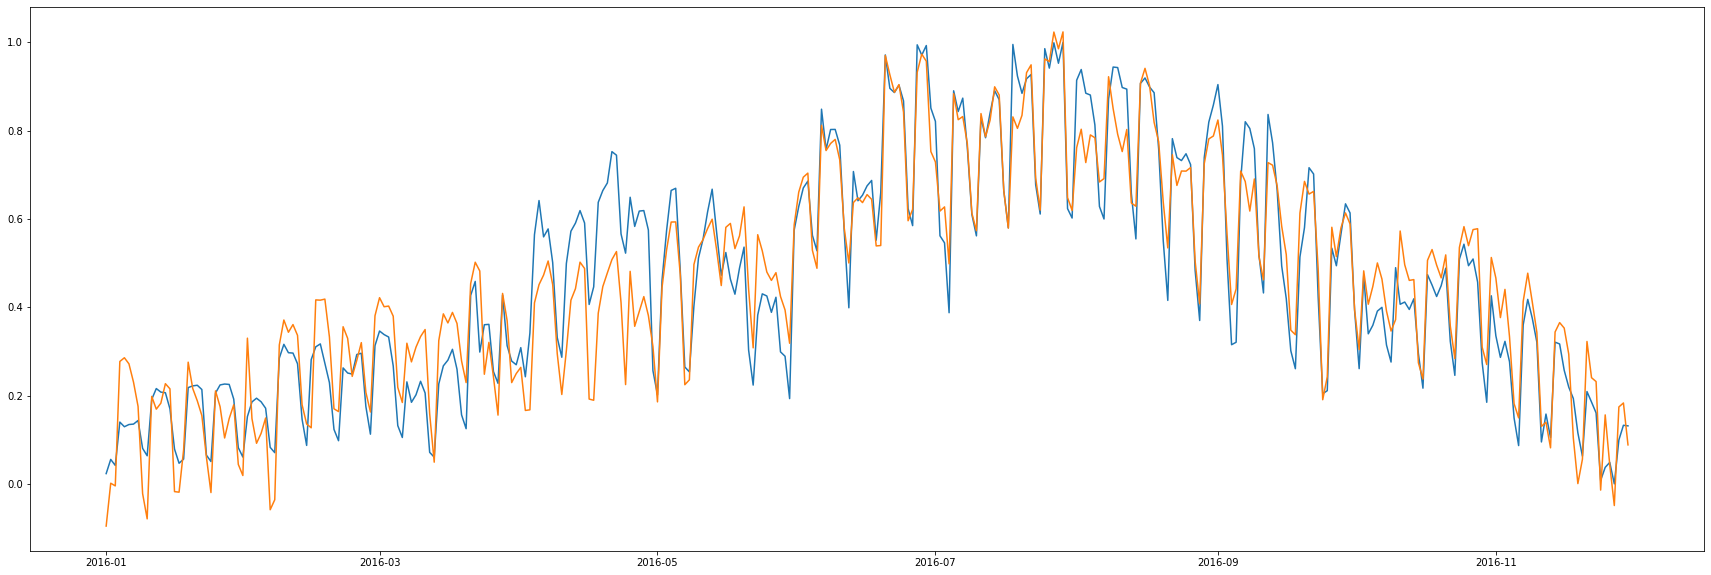

In [88]:
fig = plt.figure(figsize = (30,10))


plt.plot(y_train)
plt.plot(reg_pred)

In [94]:
X_test = scaled_daily_total2_test.iloc[:,1:]
y_test = scaled_daily_total2_test.iloc[:,0]

In [90]:
X_test.head()

air_temperature  dew_temperature  precip_depth_1_hr  \
timestamp                                                         
2016-12-01         0.096525         0.205076            0.02963   
2016-12-02         0.112976         0.250400            0.02963   
2016-12-03         0.141133         0.234672            0.02963   
2016-12-04         0.174057         0.180697            0.02963   
2016-12-05         0.167438         0.170663            0.02963   

            sea_level_pressure  wind_speed  holiday  Friday  Monday  Saturday  \
timestamp                                                                       
2016-12-01            0.822461    0.252481        0       0       0         0   
2016-12-02            0.765217    0.207128        0       1       0         0   
2016-12-03            0.721422    0.208127        0       0       0         1   
2016-12-04            0.736408    0.029422        0       0       0         0   
2016-12-05            0.756654    0.235405        0       0       1         0   

            Sunday  ...  Tuesday  Wednesday  hot  cold  cold_temperature  \
timestamp           ...                                                    
2016-12-01       0  ...        0          0    0     1          0.124142   
2016-12-02       0  ...        0          0    0     1          0.107238   
2016-12-03       0  ...        0          0    0     1          0.044992   
2016-12-04       1  ...        0          0    0     0          0.000000   
2016-12-05       0  ...        0          0    0     1          0.117843   

            hot_temperature  cold_temperature^2  hot_temperature^2  winter  \
timestamp                                                                    
2016-12-01              0.0            0.015411                0.0       0   
2016-12-02              0.0            0.011500                0.0       0   
2016-12-03              0.0            0.002024                0.0       0   
2016-12-04              0.0            0.000000                0.0       0   
2016-12-05              0.0            0.013887                0.0       0   

            summer  
timestamp           
2016-12-01       0  
2016-12-02       0  
2016-12-03       0  
2016-12-04       0  
2016-12-05       0  

[5 rows x 21 columns]

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


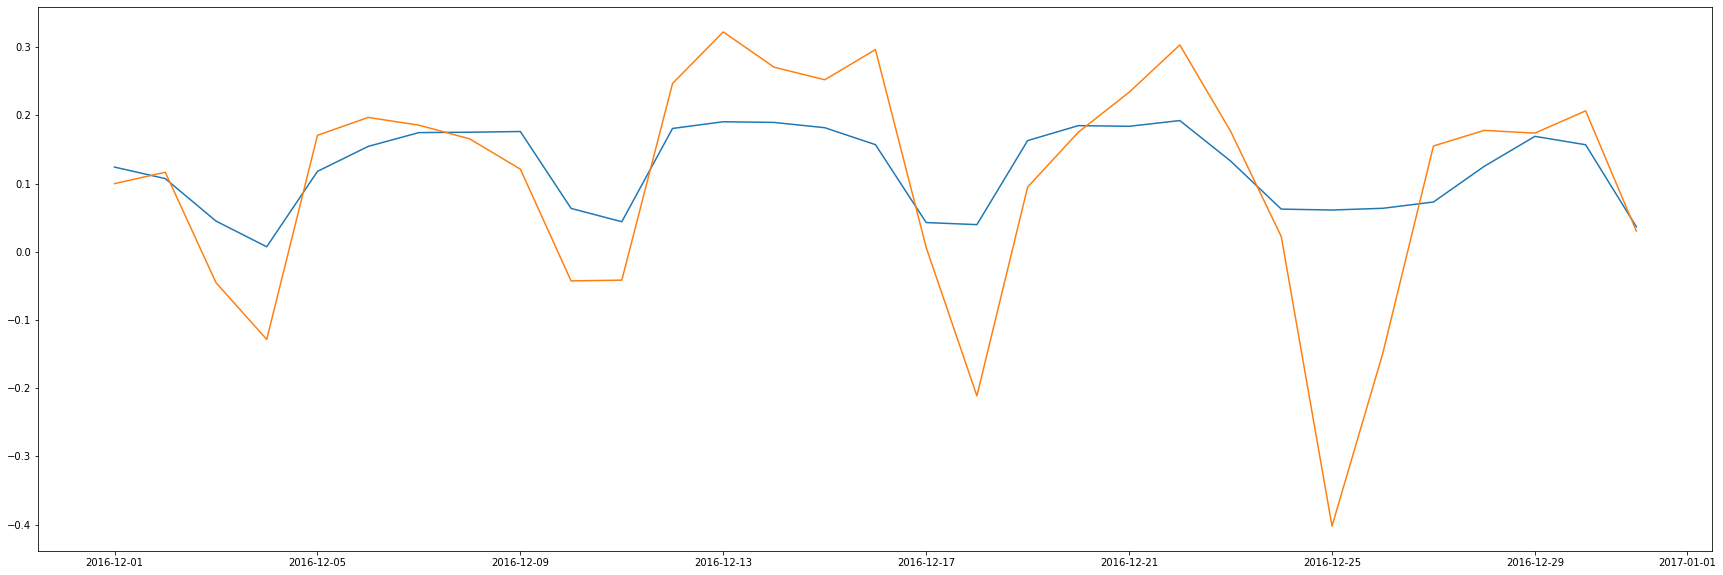

In [91]:
fig = plt.figure(figsize = (30,10))


plt.plot(y_test)
plt.plot(reg.predict(exog = sm.add_constant(X_test[result])))



In [92]:
import matplotlib.pyplot as plt

In [93]:
result

['air_temperature',
 'Sunday',
 'Saturday',
 'holiday',
 'sea_level_pressure',
 'dew_temperature',
 'hot_temperature^2',
 'hot',
 'Tuesday',
 'cold',
 'Friday']

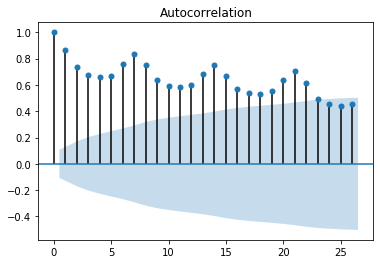

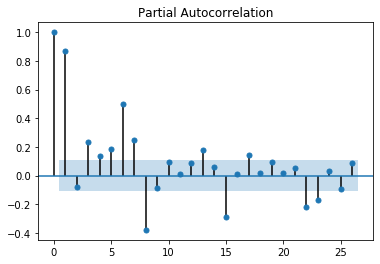

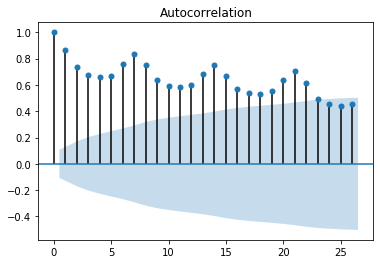

In [94]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_pacf(y_train)
plot_acf(y_train)

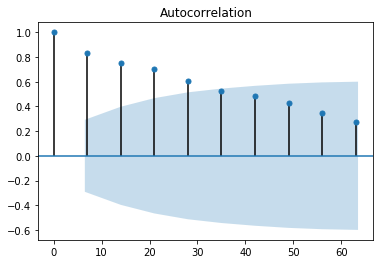

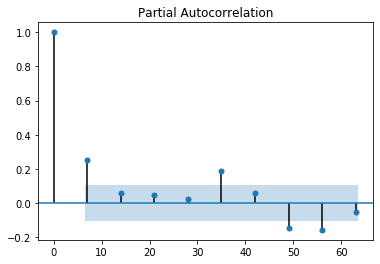

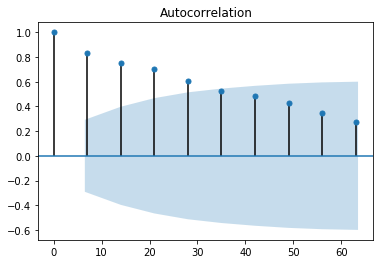

In [95]:
plot_pacf(y_train, lags=np.arange(10)*7)
plot_acf(y_train, lags = np.arange(10)*7)

In [95]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [96]:
selected_X_train = X_train[result]

In [118]:
a= pd.DataFrame(np.array([1,2,3,4,5,6,7,8]).reshape(1,-1), columns =['p','d','q','P','D','Q','AIC','BIC'] )

In [120]:
a

p  d  q  P  D  Q  AIC  BIC
0  1  2  3  4  5  6    7    8

In [122]:
b = pd.concat([pd.DataFrame(columns = ['p','d','q','P','D','Q','AIC','BIC']),a], axis=0)

In [123]:
pd.concat([a,b],axis=0)

p  d  q  P  D  Q AIC BIC
0  1  2  3  4  5  6   7   8
0  1  2  3  4  5  6   7   8

In [102]:
pd.DataFrame(columns = ['p','d','q','P','D','Q','AIC','BIC'])

Empty DataFrame
Columns: [p, d, q, P, D, Q, AIC, BIC]
Index: []

In [127]:
np.array([range(6)]).reshape(1,-1)

array([[0, 1, 2, 3, 4, 5]])

In [145]:
np.array('a')

array('a', dtype='<U1')

In [147]:
collection = pd.DataFrame(columns = ['p', 'd', 'q', 'P', 'D', 'Q', 'AIC', 'BIC'])


for p in range(3):
    for d in range(3):
        for q in range(3):
            for P in range(3):
                for D in range(3):
                    for Q in range(3):
                        
                        try:
        # Fit model
                            model = SARIMAX(endog = y_train,
                                exog = selected_X_train,
                                order = (p,d,q),
                                seasonal_order = (P,D,Q,7),
                                freq = "D")
                            results = model.fit()
# Print the model order and the AIC/BIC values
                            print(p, d, q, P, D, Q, results.aic, results.bic)
                            f = pd.DataFrame(np.array([p,d,q,P,D,Q, results.aic, results.bic]).reshape(1,-1),
                                             columns = ['p','d','q','P','D','Q','AIC','BIC']) 
                            collection = pd.concat([collection, f], axis = 0)
                            collection.to_csv("daily_parameters2.csv")
                        except:
# Print AIC and BIC as None when fails
                            print(p, d, q, P, D, Q, None, None)


0 0 0 0 0 0 -624.999066068535 -579.2294996866342
0 0 0 0 0 1 -720.4960793068051 -670.9123823930793
0 0 0 0 0 2 -732.7538171794858 -679.355989733935
0 0 0 0 1 0 -690.8243452349996 -645.3081819343898
0 0 0 0 1 1 -708.730256686526 -659.4210797775321


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 0 0 1 2 -712.0868387899177 -658.9846482725396
0 0 0 0 2 0 -402.22495912735747 -356.96766564979725
0 0 0 0 2 1 -640.2009244572603 -591.1721898565701


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 0 0 2 2 -653.3077251203415 -600.5075493965213
0 0 0 1 0 0 -757.9599033030199 -708.3762063892941
0 0 0 1 0 1 -757.6606173372995 -704.2627898917486


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 0 1 0 2 -755.6655392295785 -698.4535812522025
0 0 0 1 1 0 -703.7504262032974 -654.4412492943035


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 0 1 1 1 -720.2734428271826 -667.1712523098046


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 0 1 1 2 -719.1000373736123 -662.2048332478502
0 0 0 1 2 0 -503.0547284050932 -454.025993804403


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 0 1 2 1 -650.0583343655625 -597.2581586417423


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 0 1 2 2 -636.4443592078655 -579.8727423609153
0 0 0 2 0 0 -757.5234842962789 -704.125656850728


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 0 2 0 1 -755.4266799382244 -698.2147219608485


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 0 2 0 2 -759.1856237851978 -698.1595352759967
0 0 0 2 1 0 -711.8896997915589 -658.7875092741808


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 0 2 1 1 -712.3957249082031 -655.500520782441


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 0 2 1 2 -708.551873828684 -647.8636560945378
0 0 0 2 2 0 -592.9031931798502 -540.10301745603


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 0 2 2 1 -655.8085569364791 -599.2369400895288


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 0 2 2 2 -655.012406582787 -594.6693486127067
0 0 1 0 0 0 -795.4011308399095 -745.8174339261836
0 0 1 0 0 1 -841.9787009831797 -788.5808735376288


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 1 0 0 2 -847.4656827114176 -790.2537247340416
0 0 1 0 1 0 -773.3304791620972 -724.0213022531033
0 0 1 0 1 1 -823.5166813344824 -770.4144908171044


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 1 0 1 2 -824.2505220119402 -767.3553178861781
0 0 1 0 2 0 -457.17510482139835 -408.14637022070815


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 1 0 2 1 -720.7099799216737 -667.9098041978535


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 1 0 2 2 -761.3678804475841 -704.7962636006339
0 0 1 1 0 0 -861.8614667123038 -808.4636392667529


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 1 1 0 1 -868.608971268774 -811.397013291398


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 1 1 0 2 -866.7102864142765 -805.6841979050755
0 0 1 1 1 0 -806.3343625674215 -753.2321720500435


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 1 1 1 1 -825.1103178233634 -768.2151136976013


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 1 1 1 2 -822.2578410032925 -761.5696232691462
0 0 1 1 2 0 -572.9086205801858 -520.1084448563656


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 1 1 2 1 -748.698156036887 -692.1265391899367


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 1 1 2 2 -718.9798438808114 -658.6367859107311


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 1 2 0 0 -866.4321916481013 -809.2202336707253


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 1 2 0 1 -866.6039129895714 -805.5778244803704


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 1 2 0 2 -867.2959701195756 -802.4557510785495
0 0 1 2 1 0 -825.2155079448288 -768.3203038190667


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 1 2 1 1 -823.4088619571953 -762.720644223049


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 1 2 1 2 -821.8799749981367 -757.3987436556063
0 0 1 2 2 0 -675.6450161203376 -619.0733992733874


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 1 2 2 1 -763.285810163628 -702.9427521935477


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 1 2 2 2 -759.4281769523042 -695.3136778590939


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 2 0 0 0 -873.2756112763254 -819.8777838307745
0 0 2 0 0 1 -895.8545286177189 -838.6425706403429
0 0 2 0 0 2 -902.1774234829581 -841.1513349737571
0 0 2 0 1 0 -804.6902111505508 -751.5880206331727
0 0 2 0 1 1 -885.0243482463193 -828.1291441205572


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 2 0 1 2 -883.021363523925 -822.3331457897787
0 0 2 0 2 0 -471.83278168367565 -419.03260595985546


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 2 0 2 1 -750.4158759110672 -693.8442590641171


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 2 0 2 2 -818.9811403434304 -758.6380823733501


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 2 1 0 0 -909.249919638642 -852.0379616612661


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 2 1 0 1 -925.7048593151931 -864.678770805992


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 2 1 0 2 -925.682555616911 -860.8423365758849


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 2 1 1 0 -857.814155340417 -800.9189512146548
0 0 2 1 1 1 -883.0245693189681 -822.3363515848218


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 2 1 1 2 -881.0244056657876 -816.5431743232572
0 0 2 1 2 0 -601.9426373177497 -545.3710204707995


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 2 1 2 1 -798.29500719294 -737.9519492228598


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 2 1 2 2 -788.3290125033362 -724.214513410126


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 2 2 0 0 -920.6670174218445 -859.6409289126435
0 0 2 2 0 1 -924.8705868653986 -860.0303678243725


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 2 2 0 2 -924.6036498105955 -855.9493002377443
0 0 2 2 1 0 -885.321523558764 -824.6333058246178


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 2 2 1 1 -881.7198822949388 -817.2386509524083


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 2 2 1 2 -879.5380530780985 -811.2638081271839
0 0 2 2 2 0 -716.2442205972285 -655.9011626271482


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 2 2 2 1 -821.1628706756999 -757.0483715824896


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 2 2 2 2 -813.870190335845 -745.9842501195047
0 1 0 0 0 0 -943.8224685271273 -898.0887766114068
0 1 0 0 0 1 -944.1983340056754 -894.6535010969783
0 1 0 0 0 2 -943.8019711957353 -890.4459972940615
0 1 0 0 1 0 -739.4565642435166 -693.9770421927495
0 1 0 0 1 1 -909.0288499109868 -859.7593676893225


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 0 0 1 2 -907.6852376980033 -854.6257953054418
0 1 0 0 2 0 -383.51309336460224 -338.293241415077
0 1 0 0 2 1 -687.5470564378195 -638.5588834925004


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 0 0 2 2 -831.0007099475322 -778.2442160064194
0 1 0 1 0 0 -944.6218164915404 -895.0769835828432


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 0 1 0 1 -953.5871396076802 -900.2311657060064


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 0 1 0 2 -954.923893599675 -897.7567787050245
0 1 0 1 1 0 -824.7701805162741 -775.5006982946098


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 0 1 1 1 -907.6240510261953 -854.5646086336337


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 0 1 1 2 -905.069184698423 -848.2197821349641
0 1 0 1 2 0 -534.0859933035964 -485.0978203582774


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 0 1 2 1 -765.1066964844581 -712.3502025433453


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 0 1 2 2 -820.9154663210165 -764.39065138411
0 1 0 2 0 0 -945.6939495565332 -892.3379756548594


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 0 2 0 1 -953.8149250109752 -896.6478101163248


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 0 2 0 2 -949.7873296054934 -888.8090737178661
0 1 0 2 1 0 -882.960374293174 -829.9009319006125


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 0 2 1 1 -906.4524526531854 -849.6030500897266
0 1 0 2 1 2 -906.0462749475372 -845.4069122131812
0 1 0 2 2 0 -654.3623009476206 -601.6058070065078


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 0 2 2 1 -817.2529608076931 -760.7281458707864


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 0 2 2 2 -794.8463179566901 -734.5531820239897


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1 0 0 0 -949.5653123731825 -900.0204794644853


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1 0 0 1 -950.6614027014659 -897.3054287997921
0 1 1 0 0 2 -949.4025400514042 -892.2354251567538
0 1 1 0 1 0 -751.3833615226096 -702.1138793009453


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1 0 1 1 -914.6420560351145 -861.5826136425529


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1 0 1 2 -912.7744567807307 -855.925054217272
0 1 1 0 2 0 -401.3651099480248 -352.37693700270574


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1 0 2 1 -699.1862989647212 -646.4298050236084


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1 0 2 2 -834.8173455416234 -778.2925306047168
0 1 1 1 0 0 -951.0788412367833 -897.7228673351095


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1 1 0 1 -958.7381804087076 -901.5710655140572


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1 1 0 2 -957.3823519486639 -896.4040960610366
0 1 1 1 1 0 -829.7945459399685 -776.735103547407


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1 1 1 1 -912.7652727868544 -855.9158702233956


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1 1 1 2 -911.0459835586138 -850.4066208242577
0 1 1 1 2 0 -540.3384724096145 -487.5819784685017


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1 1 2 1 -768.2449560971702 -711.7201411602637


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1 1 2 2 -741.0502620884806 -680.7571261557803
0 1 1 2 0 0 -951.1301026242891 -893.9629877296386


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1 2 0 1 -958.4813856461983 -897.503129758571


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1 2 0 2 -955.8310618093985 -891.0416649287946


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1 2 1 0 -888.1855947387787 -831.3361921753199


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1 2 1 1 -912.0651589647114 -851.4257962303553


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1 2 1 2 -911.7913273569628 -847.3620044517095
0 1 1 2 2 0 -661.5807824491087 -605.0559675122022


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1 2 2 1 -822.5649575492039 -762.2718216165035


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 1 2 2 2 -817.8034200960152 -753.7419631675211


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 0 0 0 -962.5381611857807 -909.1821872841069


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 0 0 1 -963.310766821699 -906.1436519270485


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 0 0 2 -961.4538048172808 -900.4755489296535
0 1 2 0 1 0 -766.93054158874 -713.8710991961784


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 0 1 1 -924.7718517646939 -867.9224492012352


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 0 1 2 -922.68976070699 -862.050397972634
0 1 2 0 2 0 -447.55746579312995 -394.80097185201714


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 0 2 1 -713.1956223441641 -656.6708074072576


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 0 2 2 -842.3730415941989 -782.0799056614985


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 1 0 0 -963.5364287512889 -906.3693138566384


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 1 0 1 -962.1433388543444 -901.1650829667171


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 1 0 2 -963.686976721576 -898.8975798409721
0 1 2 1 1 0 -836.7190385612025 -779.8696359977437


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 1 1 1 -922.0309008678366 -861.3915381334806


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 1 1 2 -921.6962132325407 -857.2668903272873


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 1 2 0 -561.198064601057 -504.67324966415043


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 1 2 1 -776.8299977800946 -716.5368618473942


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 1 2 2 -787.9900465775478 -723.9285896490537


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 2 0 0 -962.503268430492 -901.5250125428647


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 2 0 1 -961.7045942729413 -896.9151973923374


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 2 0 2 -964.4666445224574 -895.8661066488768


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 2 1 0 -900.7077302281239 -840.0683674937678


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 2 1 1 -920.6398292152932 -856.2105063100398


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 2 1 2 -922.6383638868703 -854.4190808107197
0 1 2 2 2 0 -675.0485837552428 -614.7554478225425


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 2 2 1 -830.4455550641097 -766.3840981356157


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 2 2 2 2 -827.9256597704767 -760.0958818461888
0 2 0 0 0 0 -676.0942568318576 -630.3965469520923
0 2 0 0 0 1 -675.3193100383796 -625.8134576686339
0 2 0 0 0 2 -678.0188540075733 -624.7048591478471
0 2 0 0 1 0 -469.6999804445568 -424.2572118681563
0 2 0 0 1 1 -648.738833834786 -599.5091678770187
0 2 0 0 1 2 -650.0766639901174 -597.0601006509835
0 2 0 0 2 0 -115.01527549502129 -69.83298226160315
0 2 0 0 2 1 -423.4002314386753 -374.4527471024723


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 0 0 2 2 -576.725792487062 -524.0131170480742
0 2 0 1 0 0 -675.6614653957944 -626.1556130260486


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 0 1 0 1 -686.4965874931854 -633.1825926334592


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 0 1 0 2 -692.1057560462662 -634.9836186965595
0 2 0 1 1 0 -567.9995742418753 -518.769908284108
0 2 0 1 1 1 -649.8758047374668 -596.8592413983329


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 0 1 1 2 -648.0573830537219 -591.2539223332212
0 2 0 1 2 0 -282.7837662932405 -233.8362819570375


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 0 1 2 1 -513.5321946013125 -460.8195191623247


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 0 1 2 2 -571.2829126306583 -514.8050460888857
0 2 0 2 0 0 -679.904723729604 -626.5907288698778


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 0 2 0 1 -690.2789256892759 -633.1567883395692


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 0 2 0 2 -684.7992100864305 -623.8689302467435
0 2 0 2 1 0 -626.9293836399941 -573.9128203008602


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 0 2 1 1 -648.7455993164667 -591.9421385959661


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 0 2 1 2 -648.1628443874249 -587.5724862855576
0 2 0 2 2 0 -400.5355422946452 -347.82286685565737


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 0 2 2 1 -566.2519110718467 -509.7740445300741


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 0 2 2 2 -573.1570506968076 -512.91399305225


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 0 0 0 -929.1952201162646 -879.6893677465189


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 0 0 1 -928.199611143291 -874.8856162835648


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 0 0 2 -928.2741603792376 -871.1520230295309


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 0 1 0 -728.3390073029437 -679.1093413451765


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 0 1 1 -885.3788598411791 -832.3622965020452


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 0 1 2 -888.7115760189702 -831.9081152984695


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 0 2 0 -373.448450026872 -324.50096569066903


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 0 2 1 -671.1364392760854 -618.4237638370976


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 0 2 2 -803.799237783144 -747.3213712413714


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 1 0 0 -928.9214971541078 -875.6075022943816


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 1 0 1 -932.4571509828673 -875.3350136331607


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 1 0 2 -942.7055710424863 -881.7752912027993


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 1 1 0 -812.2328973566196 -759.2163340174857


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 1 1 1 -878.8343086571037 -822.0308479366031


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 1 1 2 -883.5605358800955 -822.9701777782282


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 1 2 0 -522.3577403829992 -469.6450649440113


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 1 2 1 -747.7340462503751 -691.2561797086024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 1 2 2 -669.0623269362809 -608.8192692917233


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 2 0 0 -930.6609227681029 -873.5387854183962


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 2 0 1 -942.2617469767551 -881.3314671370681


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 2 0 2 -936.0066129525401 -871.2681906228726


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 2 1 0 -869.4522293184398 -812.6487685979391


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 2 1 1 -885.1938529478283 -824.603494845961


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 2 1 2 -877.1500458938335 -812.7727904105994


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 2 2 0 -641.0787586336867 -584.600892091914


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 2 2 1 -799.0147922046476 -738.7717345600901


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 1 2 2 2 -747.0408877489502 -683.0326390016079


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 0 0 0 -927.0095183327189 -873.6955234729927


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 0 0 1 -934.1281010601492 -877.0059637104425


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 0 0 2 -922.0502552856219 -861.1199754459349


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 0 1 0 -739.4692965867132 -686.4527332475793


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 0 1 1 -885.7329149734987 -828.9294542529981


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 0 1 2 -884.7220330651755 -824.1316749633082


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 0 2 0 -390.2628734860015 -337.55019804701374


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 0 2 1 -682.0829093362696 -625.605042794497


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 0 2 2 -810.926018516267 -750.6829608717095


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 1 0 0 -934.7084272449556 -877.5862898952489


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 1 0 1 -936.7354659150225 -875.8051860753353


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 1 0 2 -943.8174015633037 -879.0789792336362


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 1 1 0 -816.1986883099069 -759.3952275894062


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 1 1 1 -878.6659439113041 -818.0755858094368


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 1 1 2 -884.442208043751 -820.0649525605169


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 1 2 0 -528.2571596359187 -471.77929309414606


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 1 2 1 -751.2512062363647 -691.0081485918072


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 1 2 2 -809.7212790270531 -745.7130302797108


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 2 0 0 -935.312401627087 -874.3821217873999


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 2 0 1 -943.3341769831677 -878.5957546535002


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 2 0 2 -933.6899105362985 -865.1433457166505


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 2 1 0 -872.4722537927788 -811.8818956909115


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 2 1 1 -884.6371151650428 -820.2598596818087


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 2 1 2 -879.7596934045503 -811.5955405399495


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 2 2 0 -647.6053075406103 -587.3622498960527


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 2 2 1 -797.510348471712 -733.5020997243696


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 2 2 2 2 2 -780.7990130835253 -713.0255732333981


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 0 0 0 -958.6418252570895 -909.0581283433637


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 0 0 1 -961.695099979246 -908.2972725336951


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 0 0 2 -961.9892300725498 -904.7772720951739
1 0 0 0 1 0 -809.562621131936 -760.2534442229421


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 0 1 1 -935.7805074873907 -882.6783169700126


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 0 1 2 -934.3687408276354 -877.4735367018733
1 0 0 0 2 0 -471.0204458790855 -421.9917112783953


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 0 2 1 -755.944062066339 -703.1438863425188


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 0 2 2 -860.9889703654835 -804.4173535185332


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 1 0 0 -962.7484165256984 -909.3505890801475


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 1 0 1 -975.7365048449705 -918.5245468675945


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 1 0 2 -978.056608012577 -917.030519503376


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 1 1 0 -875.5090525841064 -822.4068620667283


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 1 1 1 -934.4536076189764 -877.5584034932143


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 1 1 2 -932.0932056147642 -871.4049878806179
1 0 0 1 2 0 -601.9913430730854 -549.1911673492652


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 1 2 1 -814.7670764766417 -758.1954596296914


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 1 2 2 -822.1449106987461 -761.8018527286658


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 2 0 0 -965.1485216784638 -907.9365637010878


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 2 0 1 -977.5394856140481 -916.5133971048471


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 2 0 2 -976.0879533482552 -911.247734307229


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 2 1 0 -922.1193864339477 -865.2241823081856


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 2 1 1 -933.2940413635135 -872.6058236293673


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 2 1 2 -932.4683955117864 -867.987164169256
1 0 0 2 2 0 -717.6248052522179 -661.0531884052677


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 2 2 1 -853.6639266416457 -793.3208686715654


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 0 2 2 2 -843.1781406406203 -779.06364154741


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 0 0 0 -959.7806599525376 -906.3828325069867


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 0 0 1 -962.1285859655434 -904.9166279881674


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 0 0 2 -961.8002330538413 -900.7741445446403
1 0 1 0 1 0 -807.6399021768092 -754.5377116594311


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 0 1 1 -935.3809488112489 -878.4857446854868


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 0 1 2 -933.7914434002109 -873.1032256660646
1 0 1 0 2 0 -469.6349123078228 -416.8347365840026


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 0 2 1 -752.411488643821 -695.8398717968707


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 0 2 2 -858.9380775006402 -798.59501953056


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 1 0 0 -962.9529630386646 -905.7410050612887


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 1 0 1 -976.092747864653 -915.066659355452


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 1 0 2 -976.5526992874289 -911.7124802464028


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 1 1 0 -873.5116284059212 -816.6164242801591


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 1 1 1 -933.5546157401403 -872.866398005994


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 1 1 2 -931.4786558571373 -866.9974245146068


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 1 2 0 -600.4722918772641 -543.9006750303138


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 1 2 1 -808.2567776153699 -747.9137196452896


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 1 2 2 -843.0822586000875 -778.9677595068772


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 2 0 0 -964.5866858194963 -903.5605973102953


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 2 0 1 -977.2052240798746 -912.3650050388485


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 2 0 2 -975.4585271414277 -906.8041775685765


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 2 1 0 -920.3172441137506 -859.6290263796043


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 2 1 1 -932.3566930085408 -867.8754616660103


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 2 1 2 -931.9216712747127 -863.6474263237981
1 0 1 2 2 0 -715.8471122860981 -655.5040543160178


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 2 2 1 -848.7787635654288 -784.6642644722185


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 1 2 2 2 -845.139145616742 -777.2532054004017


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 0 0 0 -961.7492290905079 -904.537271113132


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 0 0 1 -964.3603933492454 -903.3343048400444


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 0 0 2 -963.4177538076717 -898.5775347666456


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 0 1 0 -807.7776627220487 -750.8824585962866


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 0 1 1 -934.2354586509895 -873.5472409168432


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 0 1 2 -928.8754594897516 -864.3942281472212
1 0 2 0 2 0 -470.2977437302857 -413.72612688333544


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 0 2 1 -751.5200890470144 -691.1770310769341


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 0 2 2 -858.689551491675 -794.5750523984648


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 1 0 0 -965.2098181187056 -904.1837296095046


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 1 0 1 -974.6330971918513 -909.7928781508252


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 1 0 2 -976.8334602249715 -908.1791106521204


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 1 1 0 -873.7454876463104 -813.0572699121641


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 1 1 1 -930.9429404765506 -866.4617091340201


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 1 1 2 -927.4592559170079 -859.1850109660933
1 0 2 1 2 0 -603.8877877213738 -543.5447297512935


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 1 2 1 -809.6623680661146 -745.5478689729043


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 1 2 2 -837.4887557724458 -769.6028155561055


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 2 0 0 -966.3709884224763 -901.5307693814502


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 2 0 1 -976.0410432854359 -907.3866937125847


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 2 0 2 -975.0111451990824 -902.5426650944062


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 2 1 0 -918.0997564739502 -853.6185251314197


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 2 1 1 -931.6119069751779 -863.3376620242633


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 2 1 2 -931.6123200788179 -859.5450615195192


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 2 2 0 -719.43797080235 -655.3234717091398


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 2 2 1 -852.0919874500436 -784.2060472337033


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 2 2 2 -833.6388138073792 -761.9814324679089
1 1 0 0 0 0 -947.8054312764466 -898.2605983677495
1 1 0 0 0 1 -948.6748264918167 -895.3188525901429
1 1 0 0 0 2 -947.6696318081061 -890.5025169134557
1 1 0 0 1 0 -747.2454768621791 -697.9759946405148


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 0 0 1 1 -912.9251772898575 -859.865734897296


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 0 0 1 2 -911.0739464369938 -854.2245438735349
1 1 0 0 2 0 -393.9214541747228 -344.93328122940375
1 1 0 0 2 1 -695.1278232712857 -642.3713293301729


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 0 0 2 2 -834.6503642864868 -778.1255493495803
1 1 0 1 0 0 -949.1029494479153 -895.7469755462415


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 0 1 0 1 -957.2666637300629 -900.0995488354124


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 0 1 0 2 -957.7512713130478 -896.7730154254206
1 1 0 1 1 0 -828.3228893770889 -775.2634469845274


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 0 1 1 1 -911.1798381379099 -854.330435574451


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 0 1 1 2 -909.1562815112895 -848.5169187769335
1 1 0 1 2 0 -538.5656447768272 -485.8091508357144


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 0 1 2 1 -768.7152199532082 -712.1904050163016


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 0 1 2 2 -793.941007451667 -733.6478715189667
1 1 0 2 0 0 -949.4679963209283 -892.3008814262778


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 0 2 0 1 -956.8045517818058 -895.8262958941785


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 0 2 0 2 -953.9532183188599 -889.1638214382559
1 1 0 2 1 0 -886.1630407371422 -829.3136381736833


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 0 2 1 1 -910.235409967666 -849.59604723331


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 0 2 1 2 -909.8814209660243 -845.4520980607709
1 1 0 2 2 0 -659.0112146875952 -602.4863997506886


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 0 2 2 1 -820.4243324996582 -760.1311965669579


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 0 2 2 2 -808.6450704205649 -744.5836134920708


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 0 0 0 -955.7808498491308 -902.424875947457


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 0 0 1 -974.5780366817222 -917.4109217870717


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 0 0 2 -954.0704707765393 -893.092214888912


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 0 1 0 -799.8341611919046 -746.7747187993431


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 0 1 1 -937.1909991806165 -880.3415966171576


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 0 1 2 -935.2435990267822 -874.6042362924262


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 0 2 0 -461.99534335035355 -409.23884940924074


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 0 2 1 -742.7156762798995 -686.190861342993


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 0 2 2 -844.4639977744166 -784.1708618417163


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 1 0 0 -959.4045996074303 -902.2374847127799


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 1 0 1 -974.3074614395588 -913.3292055519315


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 1 0 2 -974.9322917661191 -910.1428948855151


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 1 1 0 -860.8388215728623 -803.9894190094035


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 1 1 1 -933.5414133505528 -872.9020506161968


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 1 1 2 -934.4488775925364 -870.0195546872831


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 1 2 0 -590.1056499592269 -533.5808350223203


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 1 2 1 -798.8048687764758 -738.5117328437755


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 1 2 2 -748.1405448767578 -684.0790879482636


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 2 0 0 -963.3935223043471 -902.4152664167199


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 2 0 1 -961.8676856439461 -897.0782887633421


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 2 0 2 -965.7007532246216 -897.100215351041


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 2 1 0 -912.643742079803 -852.004379345447


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 2 1 1 -933.8303988218797 -869.4010759166264


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 2 1 2 -932.9253988286022 -864.7061157524516


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 2 2 0 -699.128706978573 -638.8355710458726


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 2 2 1 -839.7412814029726 -775.6798244744784


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1 2 2 2 -824.8719941531092 -757.0422162288213


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 0 0 0 -972.4100584705774 -915.2429435759269


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 0 0 1 -974.6980606280185 -913.7198047403913


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 0 0 2 -973.5472009969843 -908.7578041163804


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 0 1 0 -798.1461173763639 -741.2967148129051


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 0 1 1 -934.436126880048 -873.796764145692


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 0 1 2 -934.421874883094 -869.9925519778407


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 0 2 0 -460.546277223876 -404.02146228696944


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 0 2 1 -739.9839822323851 -679.6908462996847


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 0 2 2 -854.5947290110064 -790.5332720825122


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 1 0 0 -975.429050587253 -914.4507946996257


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 1 0 1 -976.9964218356336 -912.2070249550296


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 1 0 2 -975.7094504642889 -907.1089125907083


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 1 1 0 -859.9253645415116 -799.2860018071556


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 1 1 1 -933.8940409573381 -869.4647180520848


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 1 1 2 -930.4744509065085 -862.255167830358


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 1 2 0 -588.1864310902648 -527.8932951575645


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 1 2 1 -796.6367103529481 -732.5752534244539


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 1 2 2 -727.5595214636126 -659.7297435393247


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 2 0 0 -975.9044968896787 -911.1151000090748


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 2 0 1 -976.0022250069418 -907.4016871333612


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 2 0 2 -978.2078893351645 -905.7962104686072


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 2 1 0 -910.9729365132828 -846.5436136080294


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 2 1 1 -930.2461928528763 -862.0269097767258


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 2 1 2 -930.6973517680922 -858.6881085210443


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 2 2 0 -697.4249925544121 -633.3635356259181


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 2 2 1 -844.1752992707665 -776.3455213464786


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 2 2 2 -811.5825739891869 -739.9844750691052
1 2 0 0 0 0 -781.2862214627554 -731.7803690930097


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 0 0 0 1 -781.3204635839923 -728.006468724266


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 0 0 0 2 -782.392554994353 -725.2704176446463
1 2 0 0 1 0 -576.8968630042916 -527.6671970465244


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 0 0 1 1 -750.9000131248472 -697.8834497857133


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 0 0 1 2 -749.9431816438997 -693.1397209233991
1 2 0 0 2 0 -217.8298359418177 -168.8823516056147


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 0 0 2 1 -528.2462532408126 -475.5335778018248


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 0 0 2 2 -674.5342109073375 -618.0563443655649
1 2 0 1 0 0 -781.7904058808216 -728.4764110210954


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 0 1 0 1 -784.303990455344 -727.1818531056373


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 0 1 0 2 -791.3776148309045 -730.4473349912173
1 2 0 1 1 0 -669.7505817151682 -616.7340183760343


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 0 1 1 1 -749.8894687618092 -693.0860080413086


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 0 1 1 2 -747.0311244510037 -686.4407663491364
1 2 0 1 2 0 -384.93292503223523 -332.22024959324744


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 0 1 2 1 -613.067872844317 -556.5900063025443


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 0 1 2 2 -666.4089491656887 -606.1658915211311
1 2 0 2 0 0 -784.4382276795791 -727.3160903298724


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 0 2 0 1 -791.7020574282874 -730.7717775886003


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 0 2 0 2 -787.9514426673503 -723.2130203376828
1 2 0 2 1 0 -721.3750419584835 -664.5715812379829


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 0 2 1 1 -748.1999387202085 -687.6095806183412


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 0 2 1 2 -747.2042995305828 -682.8270440473487
1 2 0 2 2 0 -498.38763286945914 -441.9097663276865


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 0 2 2 1 -659.0597014124893 -598.8166437679317


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 0 2 2 2 -658.667797998566 -594.6595492512237


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 0 0 0 -929.7038754681668 -876.3898806084405


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 0 0 1 -930.812155269296 -873.6900179195893


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 0 0 2 -932.7906447517298 -871.8603649120428


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 0 1 0 -735.6171801447427 -682.6006168056089


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 0 1 1 -888.79256490736 -831.9891041868593


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 0 1 2 -892.742626219278 -832.1522681174107
1 2 1 0 2 0 -383.3820949134841 -330.6694194744963


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 0 2 1 -678.3489532205167 -621.8710866787441


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 0 2 2 -814.4234012297736 -754.1803435852161


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 1 0 0 -930.7327318060039 -873.6105944562972


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 1 0 1 -935.4076365367531 -874.4773566970659


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 1 0 2 -938.3388909859698 -873.6004686563023


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 1 1 0 -815.1808434764818 -758.3773827559811


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 1 1 1 -883.5685246583748 -822.9781665565075


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 1 1 2 -887.78500813449 -823.4077526512559


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 1 2 0 -526.5186335470153 -470.0407670052426


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 1 2 1 -750.7883771616612 -690.5453195171036


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 1 2 2 -675.727919056854 -611.7196703095117


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 2 0 0 -934.0875624285378 -873.1572825888506


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 2 0 1 -942.4644970538659 -877.7260747241984


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 2 0 2 -937.4191276504861 -868.8725628308381


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 2 1 0 -871.283845027992 -810.6934869261247


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 2 1 1 -887.9158315341443 -823.5385760509103


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 2 1 2 -885.8068021504266 -817.6426492858259


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 2 2 0 -645.2477055653799 -585.0046479208223


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 2 2 1 -797.486862279873 -733.4786135325306


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 1 2 2 2 -753.7719736819341 -685.998533831807


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 0 0 0 -926.2700940725526 -869.147956722846


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 0 0 1 -927.4169415925718 -866.4866617528846


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 0 0 2 -925.6053891111796 -860.8669667815121


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 0 1 0 -735.9219504642941 -679.1184897437935


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 0 1 1 -892.009539922687 -831.4191818208197


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 0 1 2 -891.598635562306 -827.2213800790719
1 2 2 0 2 0 -384.60957587336884 -328.1317093315962


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 0 2 1 -678.3726787832738 -618.1296211387163


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 0 2 2 -811.9545703789513 -747.946321631609


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 1 0 0 -927.7347536313164 -866.8044737916293


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 1 0 1 -927.6931031839553 -862.9546808542877


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 1 0 2 -935.6268397626291 -867.0802749429811


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 1 1 0 -814.4523952442471 -753.8620371423798


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 1 1 1 -887.9698261349438 -823.5925706517097


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 1 1 2 -888.395217231966 -820.2310643673652


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 1 2 0 -526.4768931456949 -466.23383550113743


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 1 2 1 -749.9842868958144 -685.9760381484721


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 1 2 2 -677.1220581903408 -609.3486183402135


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 2 0 0 -927.9833488927812 -863.2449265631137


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 2 0 1 -935.4485270501152 -866.9019622304672


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 2 0 2 -933.3098550648886 -860.9551477552601


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 2 1 0 -870.3589302266419 -805.9816747434078


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 2 1 1 -890.7428137929559 -822.5786609283551


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 2 1 2 -887.381283192912 -815.4302329469444


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 2 2 0 -644.6520742859304 -580.6438255385881


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 2 2 1 -799.6410428488549 -731.8676029987278


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 2 2 2 -771.0445806846277 -699.5059497317156


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 0 0 0 -959.382242516215 -905.9844150706641


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 0 0 1 -962.3727631260494 -905.1608051486735


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 0 0 2 -962.1318776908194 -901.1057891816183
2 0 0 0 1 0 -807.6577102185734 -754.5555197011953


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 0 1 1 -935.255679594464 -878.3604754687019


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 0 1 2 -933.6186433730842 -872.9304256389379
2 0 0 0 2 0 -469.84830158298587 -417.0481258591657


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 0 2 1 -753.9079008191908 -697.3362839722406


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 0 2 2 -858.8844837416336 -798.5414257715533


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 1 0 0 -962.961346758721 -905.749388781345


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 1 0 1 -975.4281399725365 -914.4020514633355


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 1 0 2 -977.2081481353283 -912.3679290943022


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 1 1 0 -873.5136454913793 -816.6184413656172


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 1 1 1 -932.6614186795127 -871.9732009453664


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 1 1 2 -931.4416586190895 -866.960427276559
2 0 0 1 2 0 -600.6783730087708 -544.1067561618206


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 1 2 1 -813.2166233822841 -752.8735654122038


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 1 2 2 -802.7842176870051 -738.6697185937949


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 2 0 0 -965.6504387252451 -904.624350216044


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 2 0 1 -976.9006884744592 -912.0604694334331


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 2 0 2 -975.319212378245 -906.6648628053938


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 2 1 0 -920.3196072670125 -859.6313895328663


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 2 1 1 -932.5507552287746 -868.0695238862442


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 2 1 2 -931.5677326628901 -863.2934877119754
2 0 0 2 2 0 -715.9165734596378 -655.5735154895575


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 2 2 1 -846.1056607089259 -781.9911616157157


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 0 2 2 2 -838.8374518988019 -770.9515116824616


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 0 0 0 -921.648082599025 -864.436124621649


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 0 0 1 -945.0466989850397 -884.0206104758387


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 0 0 2 -954.8479806843914 -890.0077616433653


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 0 1 0 -809.6403194764632 -752.7451153507011


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 0 1 1 -934.5856275363866 -873.8974098022403


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 0 1 2 -932.53245572932 -868.0512243867895


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 0 2 0 -486.4170801506219 -429.8454633036717


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 0 2 1 -753.7340220502193 -693.390964080139


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 0 2 2 -854.4591264398762 -790.3446273466659


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 1 0 0 -928.1835845081038 -867.1574959989027


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 1 0 1 -980.2625217339618 -915.4223026929357


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 1 0 2 -970.3786023010096 -901.7242527281584


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 1 1 0 -873.9074704212605 -813.2192526871142


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 1 1 1 -932.7859372574526 -868.3047059149221


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 1 1 2 -930.5303611007967 -862.256116149882
2 0 1 1 2 0 -597.9937502172006 -537.6506922471203


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 1 2 1 -811.9862446263513 -747.871745533141


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 1 2 2 -789.1333951365077 -721.2474549201675


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 2 0 0 -931.9380243658984 -867.0978053248723


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 2 0 1 -921.7075581288871 -853.0532085560359


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 2 0 2 -957.0970623588089 -884.6285822541327


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 2 1 0 -919.1470426811155 -854.6658113385851


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 2 1 1 -932.1825752419247 -863.9083302910101


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 2 1 2 -930.5585641482458 -858.4913055889471


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 2 2 0 -713.6939075692317 -649.5794084760214


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 2 2 1 -853.3406311111667 -785.4546908948264


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 1 2 2 2 -837.7872581777058 -766.1298768382355


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 0 0 0 -955.8609552331754 -894.8348667239744


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 0 0 1 -958.9084732215244 -894.0682541804983


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 0 0 2 -958.2975420063358 -889.6431924334846


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 0 1 0 -806.1440742115274 -745.4558564773811


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 0 1 1 -932.2492294251175 -867.767998082587


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 0 1 2 -930.8664853701058 -862.5922404191912


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 0 2 0 -489.4919540566781 -429.1488960865978


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 0 2 1 -753.2558552810499 -689.1413561878396


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 0 2 2 -856.2287268200772 -788.342786603737


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 1 0 0 -959.8809138698002 -895.0406948287741


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 1 0 1 -971.4702344107901 -902.8158848379389


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 1 0 2 -973.7729781115825 -901.3044980069062


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 1 1 0 -873.1577387546281 -808.6765074120976


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 1 1 1 -930.6495638117012 -862.3753188607866


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 1 1 2 -928.5194737883173 -856.4522152290186


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 1 2 0 -604.3109970165167 -540.1964979233064


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 1 2 1 -811.81847396447 -743.9325337481297


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 1 2 2 -786.5458140170266 -714.8884326775562


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 2 0 0 -962.9498462911729 -894.2954967183217


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 2 0 1 -973.4799426680288 -901.0114625633526


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 2 0 2 -971.9609933025889 -895.6783826660876


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 2 1 0 -918.0831533742476 -849.8089084233329


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 2 1 1 -929.7661391688746 -857.6988806095759


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 2 1 2 -928.5461579177932 -852.6858857501103


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 2 2 0 -719.206100410533 -651.3201601941928


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 2 2 1 -845.8549813802933 -774.1976000408231


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 2 2 2 -836.9619026211737 -761.5330801585734
2 1 0 0 0 0 -947.647513506012 -894.2915396043383
2 1 0 0 0 1 -948.6575185155064 -891.4904036208559
2 1 0 0 0 2 -947.4500735426025 -886.4718176549752
2 1 0 0 1 0 -748.850468692734 -695.7910263001725


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 0 0 1 1 -912.576049742576 -855.7266471791172


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 0 0 1 2 -910.6560120477 -850.0166493133439
2 1 0 0 2 0 -398.3476066328187 -345.5911126917059


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 0 0 2 1 -696.6880800173983 -640.1632650804918


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 0 0 2 2 -832.5822249155883 -772.289088982888
2 1 0 1 0 0 -949.0741310901655 -891.907016195515


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 0 1 0 1 -956.492354446025 -895.5140985583978


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 0 1 0 2 -957.176039198818 -892.3866423182141
2 1 0 1 1 0 -827.6672504093615 -770.8178478459026


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 0 1 1 1 -910.796582798686 -850.15722006433


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 0 1 1 2 -908.917437924971 -844.4881150197176
2 1 0 1 2 0 -537.9605645990005 -481.4357496620939


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 0 1 2 1 -766.5246090784545 -706.2314731457542


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 0 1 2 2 -802.840867828498 -738.7794109000038
2 1 0 2 0 0 -949.1896839763774 -888.2114280887502


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 0 2 0 1 -956.8661720675325 -892.0767751869286


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 0 2 0 2 -953.8124597849318 -885.2119219113512


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 0 2 1 0 -886.6491574547546 -826.0097947203985


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 0 2 1 1 -909.8786425925514 -845.449319687298


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 0 2 1 2 -909.682098795834 -841.4628157196835
2 1 0 2 2 0 -659.1623039507265 -598.8691680180261


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 0 2 2 1 -820.7987836422959 -756.7373267138018


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 0 2 2 2 -801.3577340870191 -733.5279561627312


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 0 0 0 -973.3772836710889 -916.2101687764384


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 0 0 1 -974.3486425821441 -913.3703866945168


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 0 0 2 -970.5579524155248 -905.7685555349209


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 0 1 0 -788.7248124425549 -731.8754098790962


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 0 1 1 -926.4844070152046 -865.8450442808486


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 0 1 2 -925.1933599350302 -860.7640370297769


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 0 2 0 -459.20294896099546 -402.6781340240889


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 0 2 1 -740.9934801632058 -680.7003442305055


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 0 2 2 -849.6746847700297 -785.6132278415355


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 1 0 0 -974.4013426794819 -913.4230867918546


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 1 0 1 -978.9483461394536 -914.1589492588497


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 1 0 2 -979.9265646513907 -911.3260267778101


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 1 1 0 -853.6482367677249 -793.0088740333689


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 1 1 1 -927.8416953770441 -863.4123724717907


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 1 1 2 -913.8764540522938 -845.6571709761432


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 1 2 0 -587.4032655482495 -527.1101296155491


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 1 2 1 -796.9602078368549 -732.8987509083609


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 1 2 2 -790.7373291481935 -722.9075512239056


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 2 0 0 -975.9983159662872 -911.2089190856833


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 2 0 1 -980.7042634729908 -912.1037255994102


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 2 0 2 -971.4649584339775 -899.0532795674202


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 2 1 0 -912.0333079044788 -847.6039849992254


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 2 1 1 -931.2388458926835 -863.0195628165329


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 2 1 2 -922.5345308914755 -850.5252876444276


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 2 2 0 -693.7145051231817 -629.6530481946875


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 2 2 1 -844.9522529308542 -777.1224750065663


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 2 2 2 -806.6098033251526 -735.011704405071


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 0 0 0 -969.5390891637337 -908.5608332761065


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 0 0 1 -972.3793749461894 -907.5899780655855


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 0 0 2 -971.4613555574078 -902.8608176838272


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 0 1 0 -800.8413752903876 -740.2020125560316


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 0 1 1 -934.2213522761109 -869.7920293708576


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 0 1 2 -932.140226420401 -863.9209433442504


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 0 2 0 -464.14717810300584 -403.8540421703055


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 0 2 1 -743.2937950570426 -679.2323381285485


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 0 2 2 -852.0774657677034 -784.2476878434155


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 1 0 0 -973.4561914234378 -908.6667945428338


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 1 0 1 -972.4517061716072 -903.8511682980266


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 1 0 2 -972.0169132167539 -899.6052343501966


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 1 1 0 -863.8170216226875 -799.3876987174342


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 1 1 1 -932.066207162348 -863.8469240861974


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 1 1 2 -931.1240477056707 -859.1148044586229


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 1 2 0 -589.68572884526 -525.6242719167658


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 1 2 1 -795.7486488386293 -727.9188709143414


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 1 2 2 -740.7098719943901 -669.1117730743085


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 2 0 0 -974.0000476134517 -905.3995097398711


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 2 0 1 -973.3796385782514 -900.9679597116941


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 2 0 2 -974.7293117917995 -898.5064919322656


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 2 1 0 -909.6309494854947 -841.4116664093442


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 2 1 1 -929.724433552489 -857.7151903054412


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 2 1 2 -929.9349908181943 -854.1357874002492


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 2 2 0 -704.5476355541161 -636.7178576298282


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 2 2 1 -840.1597087043101 -768.5616097842285


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 2 2 2 2 -820.1547698919874 -744.7883499761119
2 2 0 0 0 0 -802.8298273503422 -749.5158324906159
2 2 0 0 0 1 -803.564834976162 -746.4426976264554


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 0 0 0 2 -803.0689820055911 -742.1387021659041
2 2 0 0 1 0 -602.306243259573 -549.2896799204391


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 0 0 1 1 -770.3756305739469 -713.5721698534462


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 0 0 1 2 -768.7136919052816 -708.1233338034143
2 2 0 0 2 0 -248.31554592911766 -195.60287049012985


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 0 0 2 1 -553.0034397268917 -496.525573185119


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 0 0 2 2 -691.383514343122 -631.1404566985644
2 2 0 1 0 0 -804.0266840733291 -746.9045467236224


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 0 1 0 1 -807.1622621923691 -746.231982352682


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 0 1 0 2 -809.2241015772142 -744.4856792475467
2 2 0 1 1 0 -687.7714794547401 -630.9680187342394


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 0 1 1 1 -768.6859170270709 -708.0955589252036
2 2 0 1 1 2 -766.3990846691518 -702.0218291859177
2 2 0 1 2 0 -403.3911595184961 -346.9132929767235


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 0 1 2 1 -630.7939242992412 -570.5508666546837


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 0 1 2 2 -685.9290954983362 -621.9208467509939
2 2 0 2 0 0 -804.8914204588518 -743.9611406191648


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 0 2 0 1 -810.4903842010526 -745.7519618713851


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 0 2 0 2 -808.3888137597539 -739.842248940106


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 0 2 1 0 -739.710707295688 -679.1203491938207


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 0 2 1 1 -766.902011966728 -702.5247564834939


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 0 2 1 2 -766.3001381038519 -698.1359852392511
2 2 0 2 2 0 -515.769321936465 -455.52626429190747


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 0 2 2 1 -676.7179790442265 -612.7097302968841


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 0 2 2 2 -661.8142953987382 -594.040855548611


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 0 0 0 -924.4308312029971 -867.3086938532904


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 0 0 1 -925.8981015139632 -864.9678216742761


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 0 0 2 -922.6462617145162 -857.9078393848487


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 0 1 0 -649.4311627806237 -592.627702060123


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 0 1 1 -744.7299858177877 -684.1396277159204


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 0 1 2 -746.8424116685684 -682.4651561853343


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 0 2 0 -387.55844822610464 -331.08058168433195


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 0 2 1 -679.8250225740776 -619.58196492952


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 0 2 2 -670.2521969666203 -606.243948219278


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 1 0 0 -926.2881287261993 -865.3578488865121


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 1 0 1 -924.184566063953 -859.4461437342854


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 1 0 2 -924.4956686780524 -855.9491038584044


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 1 1 0 -665.8277377920551 -605.2373796901878


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 1 1 1 -741.3499830313995 -676.9727275481654


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 1 1 2 -742.9861568463098 -674.822003981709


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 1 2 0 -525.7196779572021 -465.47662031264457


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 1 2 1 -734.1582509270868 -670.1500021797444


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 1 2 2 -697.2447825227542 -629.4713426726271


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 2 0 0 -924.427049656329 -859.6886273266615


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 2 0 1 -925.1388111545939 -856.5922463349459


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 2 0 2 -928.3095587164045 -855.954851406776


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 2 1 0 -718.9739064716676 -654.5966509884336


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 2 1 1 -742.4077926628017 -674.243639798201


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 2 1 2 -739.0208468553632 -667.0697966093958


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 2 2 0 -645.5964065194137 -581.5881577720713


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 1 2 2 1 -662.2798395392263 -594.506399689099
2 2 1 2 2 2 -674.6143022460716 -603.0756712931595


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 0 0 0 -926.908617510642 -865.9783376709549


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 0 0 1 -927.6577237572862 -862.9193014276187


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 0 0 2 -926.9647980042539 -858.4182331846059


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 0 1 0 -774.9295943498365 -714.3392362479692


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 0 1 1 -917.7559030077896 -853.3786475245555


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 0 1 2 -917.4468305927686 -849.2826777281679


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 0 2 0 -380.31591434441253 -320.07285669985504


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 0 2 1 -675.0919190030899 -611.0836702557475


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 0 2 2 -832.0861861610929 -764.3127463109656


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 1 0 0 -927.8228225117615 -863.084400182094


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 1 0 1 -926.3862097611088 -857.8396449414608


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 1 0 2 -928.4762763308183 -856.1215690211899


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 1 1 0 -843.788541232305 -779.4112857490709


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 1 1 1 -913.4536081946046 -845.2894553300039


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 1 1 2 -915.871095289238 -843.9200450432706


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 1 2 0 -525.2568094605333 -461.24856071319095


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 1 2 1 -748.1858799321614 -680.4124400820342


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 1 2 2 -687.7239352917308 -616.1853043388187


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 2 0 0 -928.9245658965472 -860.3780010768992


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 2 0 1 -929.5707681512197 -857.2160608415912


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 2 0 2 -930.3254936279977 -854.1626438283888


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 2 1 0 -894.9807004435206 -826.8165475789199


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 2 1 1 -915.8552051636951 -843.9041549177277


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 2 1 2 -912.9448379799232 -837.2068903525891


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 2 2 0 -640.336843386139 -572.5634035360117


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 2 2 1 -817.5861223327573 -746.0474913798453


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 2 2 2 -766.7277461012985 -691.4239240456017


In [148]:
collection

p    d    q    P    D    Q         AIC         BIC
0   0.0  0.0  0.0  0.0  0.0  0.0 -624.999066 -579.229500
0   0.0  0.0  0.0  0.0  0.0  1.0 -720.496079 -670.912382
0   0.0  0.0  0.0  0.0  0.0  2.0 -732.753817 -679.355990
0   0.0  0.0  0.0  0.0  1.0  0.0 -690.824345 -645.308182
0   0.0  0.0  0.0  0.0  1.0  1.0 -708.730257 -659.421080
..  ...  ...  ...  ...  ...  ...         ...         ...
0   2.0  2.0  2.0  2.0  1.0  1.0 -915.855205 -843.904155
0   2.0  2.0  2.0  2.0  1.0  2.0 -912.944838 -837.206890
0   2.0  2.0  2.0  2.0  2.0  0.0 -640.336843 -572.563404
0   2.0  2.0  2.0  2.0  2.0  1.0 -817.586122 -746.047491
0   2.0  2.0  2.0  2.0  2.0  2.0 -766.727746 -691.423924

[729 rows x 8 columns]

In [150]:
collection.sort_values(by='AIC').head()

p    d    q    P    D    Q         AIC         BIC
0  2.0  1.0  1.0  2.0  0.0  1.0 -980.704263 -912.103726
0  2.0  0.0  1.0  1.0  0.0  1.0 -980.262522 -915.422303
0  2.0  1.0  1.0  1.0  0.0  2.0 -979.926565 -911.326027
0  2.0  1.0  1.0  1.0  0.0  1.0 -978.948346 -914.158949
0  1.0  1.0  2.0  2.0  0.0  2.0 -978.207889 -905.796210

In [151]:
collection.sort_values(by='BIC').head()

p    d    q    P    D    Q         AIC         BIC
0  1.0  0.0  0.0  1.0  0.0  1.0 -975.736505 -918.524547
0  1.0  1.0  1.0  0.0  0.0  1.0 -974.578037 -917.410922
0  1.0  0.0  0.0  1.0  0.0  2.0 -978.056608 -917.030520
0  1.0  0.0  0.0  2.0  0.0  1.0 -977.539486 -916.513397
0  2.0  1.0  1.0  0.0  0.0  0.0 -973.377284 -916.210169

In [97]:
selected_model1 = SARIMAX(endog = y_train,
                                exog = selected_X_train,
                                order = (2,1,1),
                                seasonal_order = (2,0,1,7))

selected_results1 = selected_model1.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [98]:
X_test = scaled_daily_total2_test.iloc[:,1:]
y_test = scaled_daily_total2_test.iloc[:,0]

In [154]:
X_test.head()

air_temperature  dew_temperature  precip_depth_1_hr  \
timestamp                                                         
2016-12-01         0.096525         0.205076            0.02963   
2016-12-02         0.112976         0.250400            0.02963   
2016-12-03         0.141133         0.234672            0.02963   
2016-12-04         0.174057         0.180697            0.02963   
2016-12-05         0.167438         0.170663            0.02963   

            sea_level_pressure  wind_speed  holiday  Friday  Monday  Saturday  \
timestamp                                                                       
2016-12-01            0.822461    0.252481        0       0       0         0   
2016-12-02            0.765217    0.207128        0       1       0         0   
2016-12-03            0.721422    0.208127        0       0       0         1   
2016-12-04            0.736408    0.029422        0       0       0         0   
2016-12-05            0.756654    0.235405        0       0       1         0   

            Sunday  ...  Tuesday  Wednesday  hot  cold  cold_temperature  \
timestamp           ...                                                    
2016-12-01       0  ...        0          0    0     1          0.124142   
2016-12-02       0  ...        0          0    0     1          0.107238   
2016-12-03       0  ...        0          0    0     1          0.044992   
2016-12-04       1  ...        0          0    0     0          0.000000   
2016-12-05       0  ...        0          0    0     1          0.117843   

            hot_temperature  cold_temperature^2  hot_temperature^2  winter  \
timestamp                                                                    
2016-12-01              0.0            0.015411                0.0       0   
2016-12-02              0.0            0.011500                0.0       0   
2016-12-03              0.0            0.002024                0.0       0   
2016-12-04              0.0            0.000000                0.0       0   
2016-12-05              0.0            0.013887                0.0       0   

            summer  
timestamp           
2016-12-01       0  
2016-12-02       0  
2016-12-03       0  
2016-12-04       0  
2016-12-05       0  

[5 rows x 21 columns]

In [99]:
selected_X_test = X_test[result]

In [100]:
pred3 = selected_results1.predict(exog = selected_X_test, start = '2016-12-01', end = '2016-12-31')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


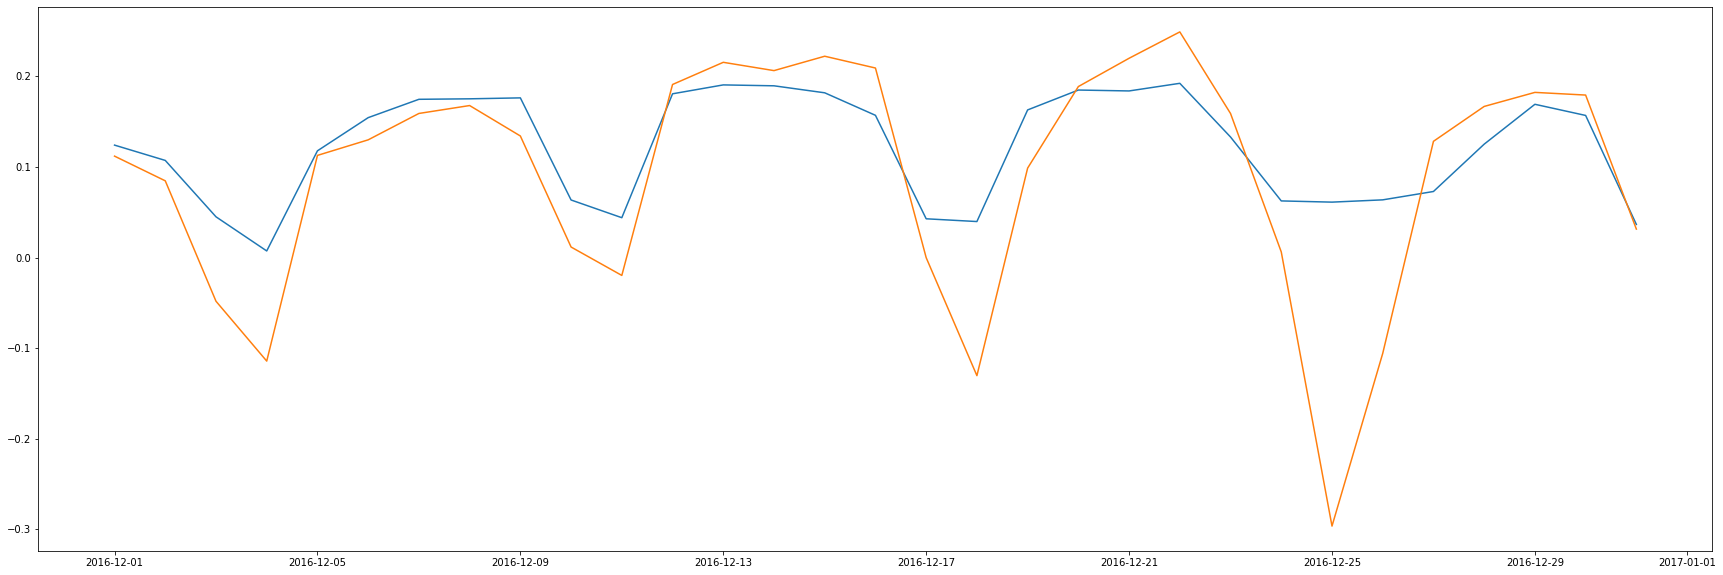

In [101]:
fig = plt.figure(figsize=(30,10))

plt.plot(y_test)
plt.plot(pred3)

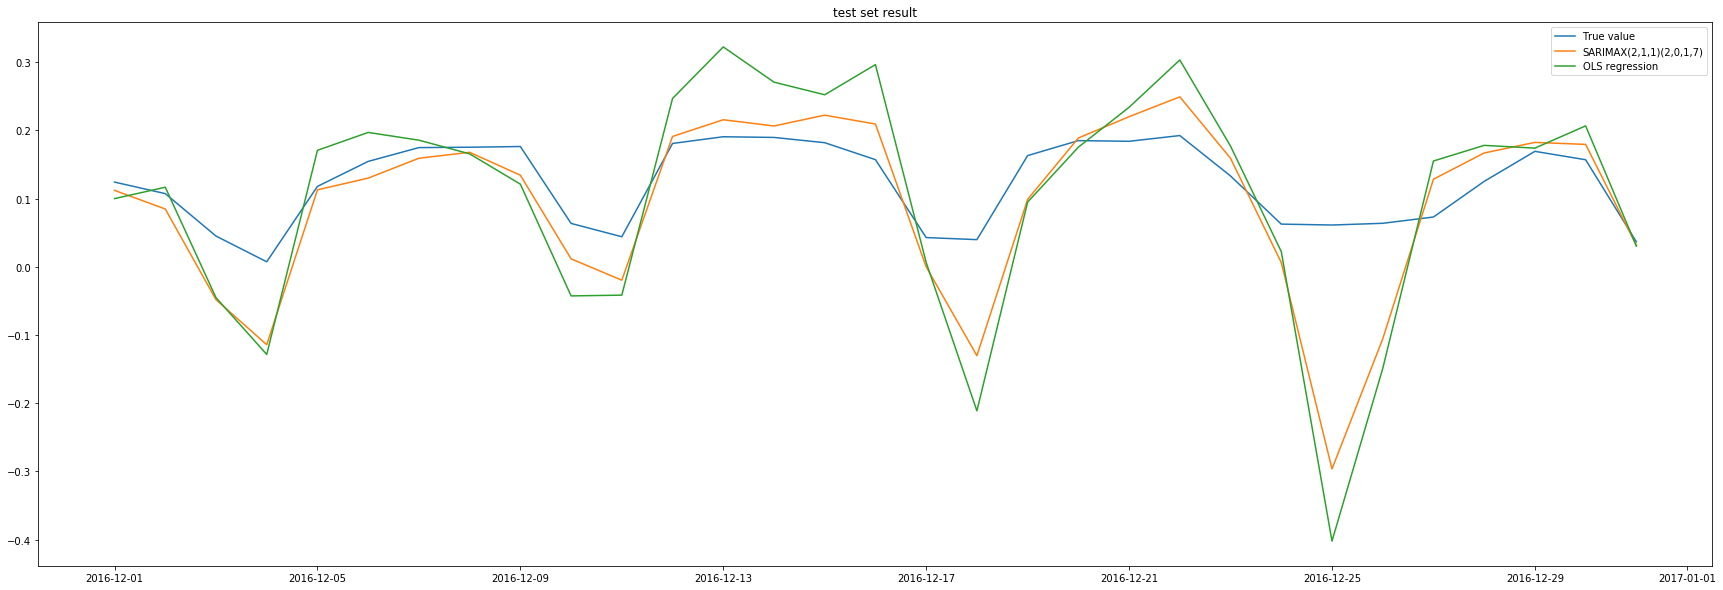

In [102]:
fig = plt.figure(figsize = (30,10))

plt.title('test set result')
plt.plot(y_test , label = 'True value')
plt.plot(pred3, label = 'SARIMAX(2,1,1)(2,0,1,7)')
plt.plot(reg.predict(exog = sm.add_constant(X_test[result])), label = 'OLS regression')
plt.legend()


plt.savefig('Daily_prediction_comparison_test')

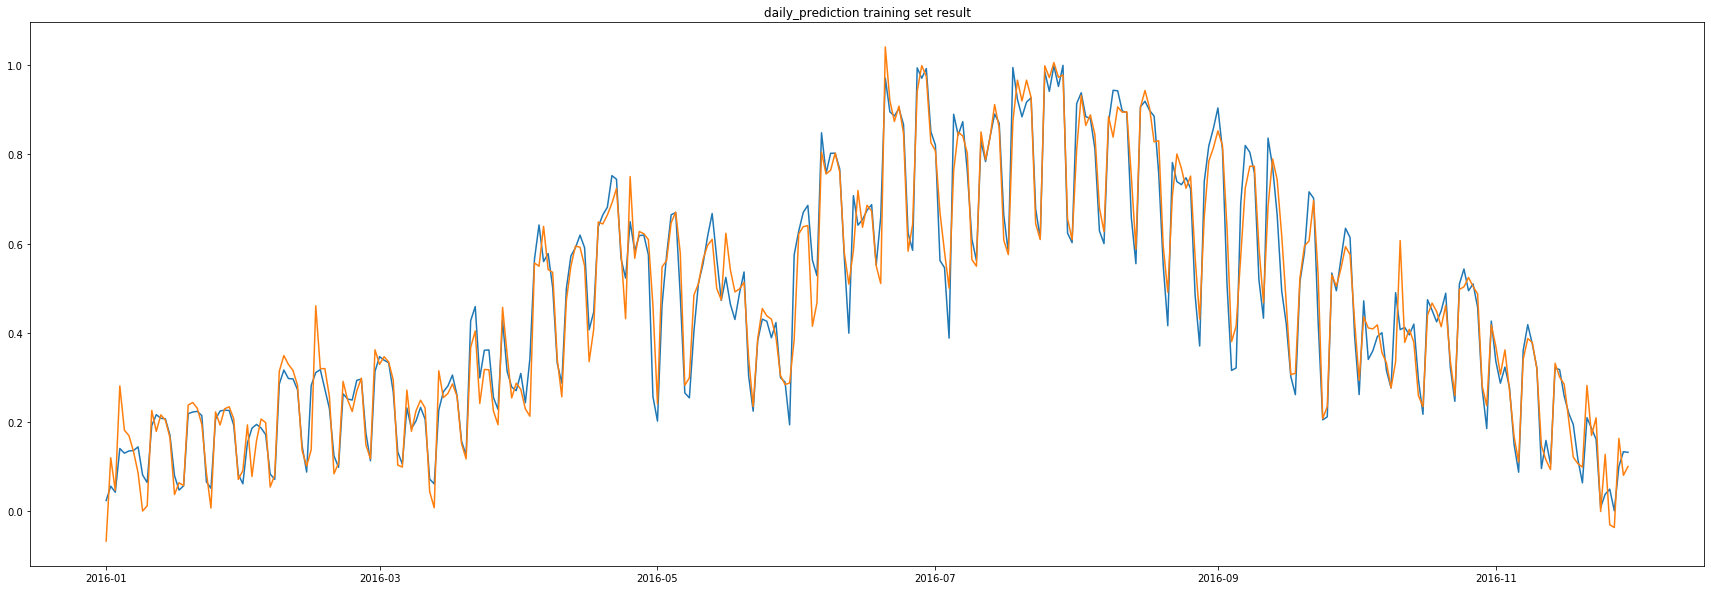

In [160]:
fig = plt.figure(figsize=(30,10))


plt.title('daily_prediction training set result')
plt.plot(y_train)
plt.plot(selected_results1.predict())
plt.savefig('Daily_prediction_comparison_training')

In [103]:
selected_results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                     meter_reading   No. Observations:                  335
Model:             SARIMAX(2, 1, 1)x(2, 0, 1, 7)   Log Likelihood                 508.352
Date:                           Sat, 30 Nov 2019   AIC                           -980.704
Time:                                   05:21:06   BIC                           -912.104
Sample:                               01-01-2016   HQIC                          -953.352
                                    - 11-30-2016                                         
Covariance Type:                             opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
air_temperature        0.5396      0.059      9.093      0.000       0.423       0.656
Sunday                -0.2097      0.011    -19.933      0.000      -0.230      -0.189
Saturday              -0.1683      0.015    -11.265      0.000      -0.198      -0.139
holiday               -0.1653      0.009    -18.527      0.000      -0.183      -0.148
sea_level_pressure     0.0851      0.038      2.245      0.025       0.011       0.159
dew_temperature        0.1471      0.026      5.615      0.000       0.096       0.198
hot_temperature^2      0.2927      0.027     10.692      0.000       0.239       0.346
hot                   -0.1911      0.017    -11.575      0.000      -0.223      -0.159
Tuesday                0.0027      0.010      0.279      0.780      -0.016       0.022
cold                   0.0209      0.026      0.806      0.420      -0.030       0.072
Friday                -0.0316      0.014     -2.197      0.028      -0.060      -0.003
ar.L1                  0.6321      0.082      7.676      0.000       0.471       0.793
ar.L2                 -0.1156      0.065     -1.770      0.077      -0.244       0.012
ma.L1                 -0.8253      0.076    -10.865      0.000      -0.974      -0.676
ar.S.L7                0.6334      0.220      2.879      0.004       0.202       1.065
ar.S.L14               0.1186      0.063      1.873      0.061      -0.006       0.243
ma.S.L7               -0.6227      0.217     -2.872      0.004      -1.048      -0.198
sigma2                 0.0028      0.000     15.753      0.000       0.002       0.003
===================================================================================
Ljung-Box (Q):                       39.35   Jarque-Bera (JB):                54.99
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               1.63   Skew:                             0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

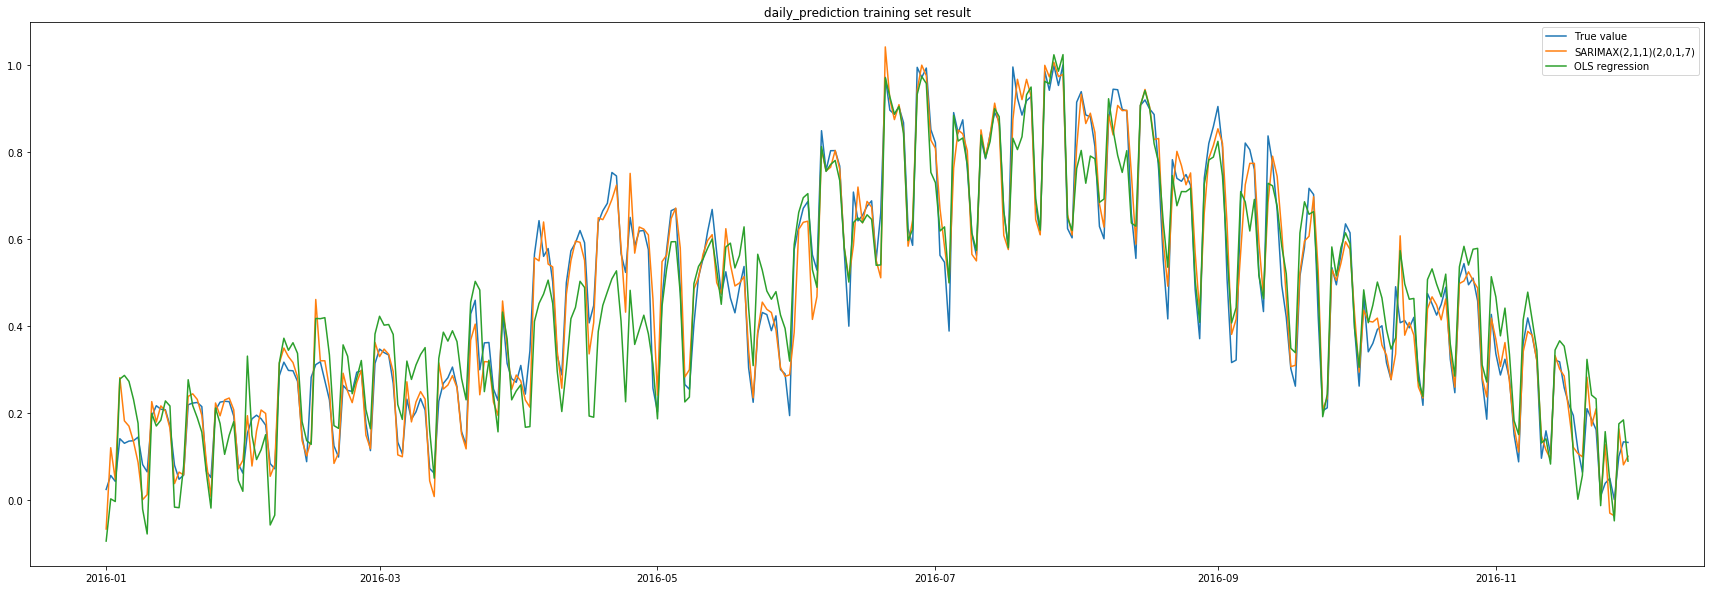

In [162]:
fig = plt.figure(figsize=(30,10))

plt.title('daily_prediction training set result')
plt.plot(y_train, label = 'True value')
plt.plot(selected_results1.predict(), label = 'SARIMAX(2,1,1)(2,0,1,7)')
plt.plot(reg_pred, label = 'OLS regression')

plt.legend()
plt.savefig('Daily_prediction_comparison_training')

In [105]:
import pickle

In [165]:
Pkl_Filename = "ols.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(reg, file)

In [106]:
Pkl_Filename = "SARIMAX(2,1,1)(2,0,1,7).pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(selected_results1, file)

In [271]:
residual = y_train - selected_results1.predict()

In [176]:
residual.to_csv("residual_(2,1,1)(2,0,1,7).csv" , header = True)

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [272]:
error_terms = y_test - pred3

In [250]:
error_terms.shape

(31,)

In [252]:
residual.shape

(335,)

In [273]:
residual_error = residual.append(error_terms)

In [274]:
residual_error_df = pd.DataFrame(residual_error)

In [238]:
residual_error_df.to_csv("residual_error_SARIMAX(2,1,1)(2,0,1,7)")

In [246]:
residual_error_df.shape

(366, 1)

In [275]:
values = residual_error_df.values

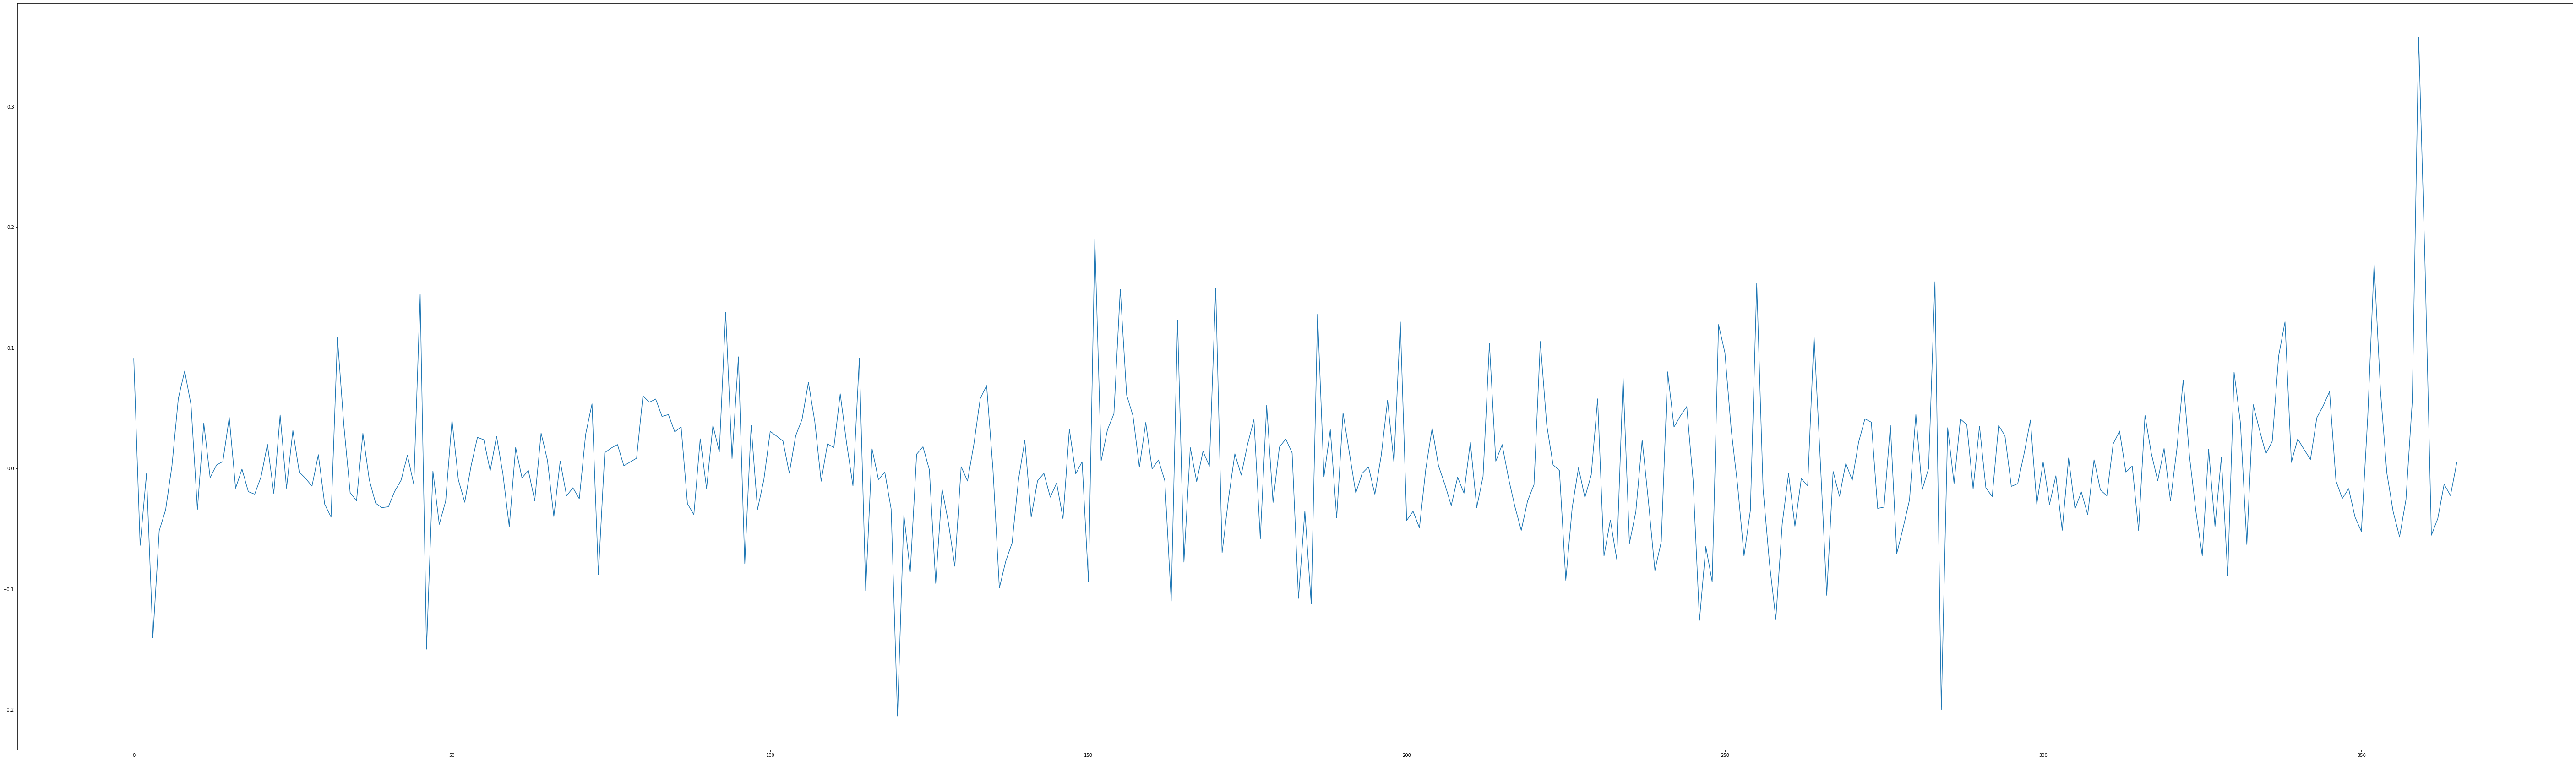

In [247]:
#EDA
plt.figure(figsize=(100,30))
plt.plot(values)
plt.show()

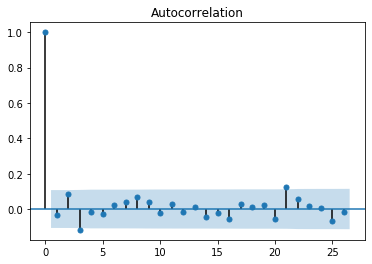

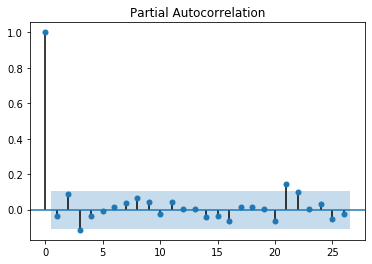

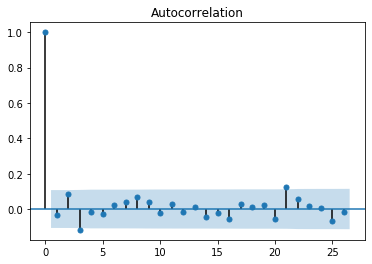

In [234]:
plot_pacf(residual)
plot_acf(residual)

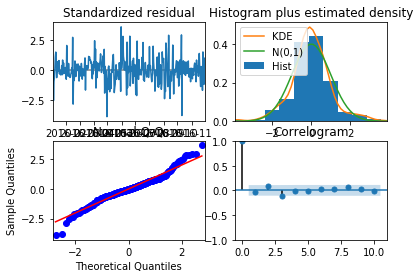

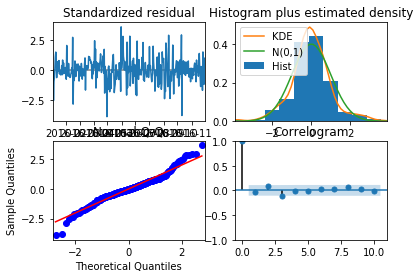

In [206]:
selected_results1.plot_diagnostics()

In [8]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [252]:
portion = pd.read_csv("data/portion_data.csv",
                     names=['time', 'value'])

In [254]:
portion = portion.set_index('time')

In [5]:
portion.head()

value
time                         
2016-01-01 00:00:00  0.040664
2016-01-01 01:00:00  0.040585
2016-01-01 02:00:00  0.041324
2016-01-01 03:00:00  0.042763
2016-01-01 04:00:00  0.043817

In [12]:
portion.shape

(8784, 1)

In [9]:
values = portion.values

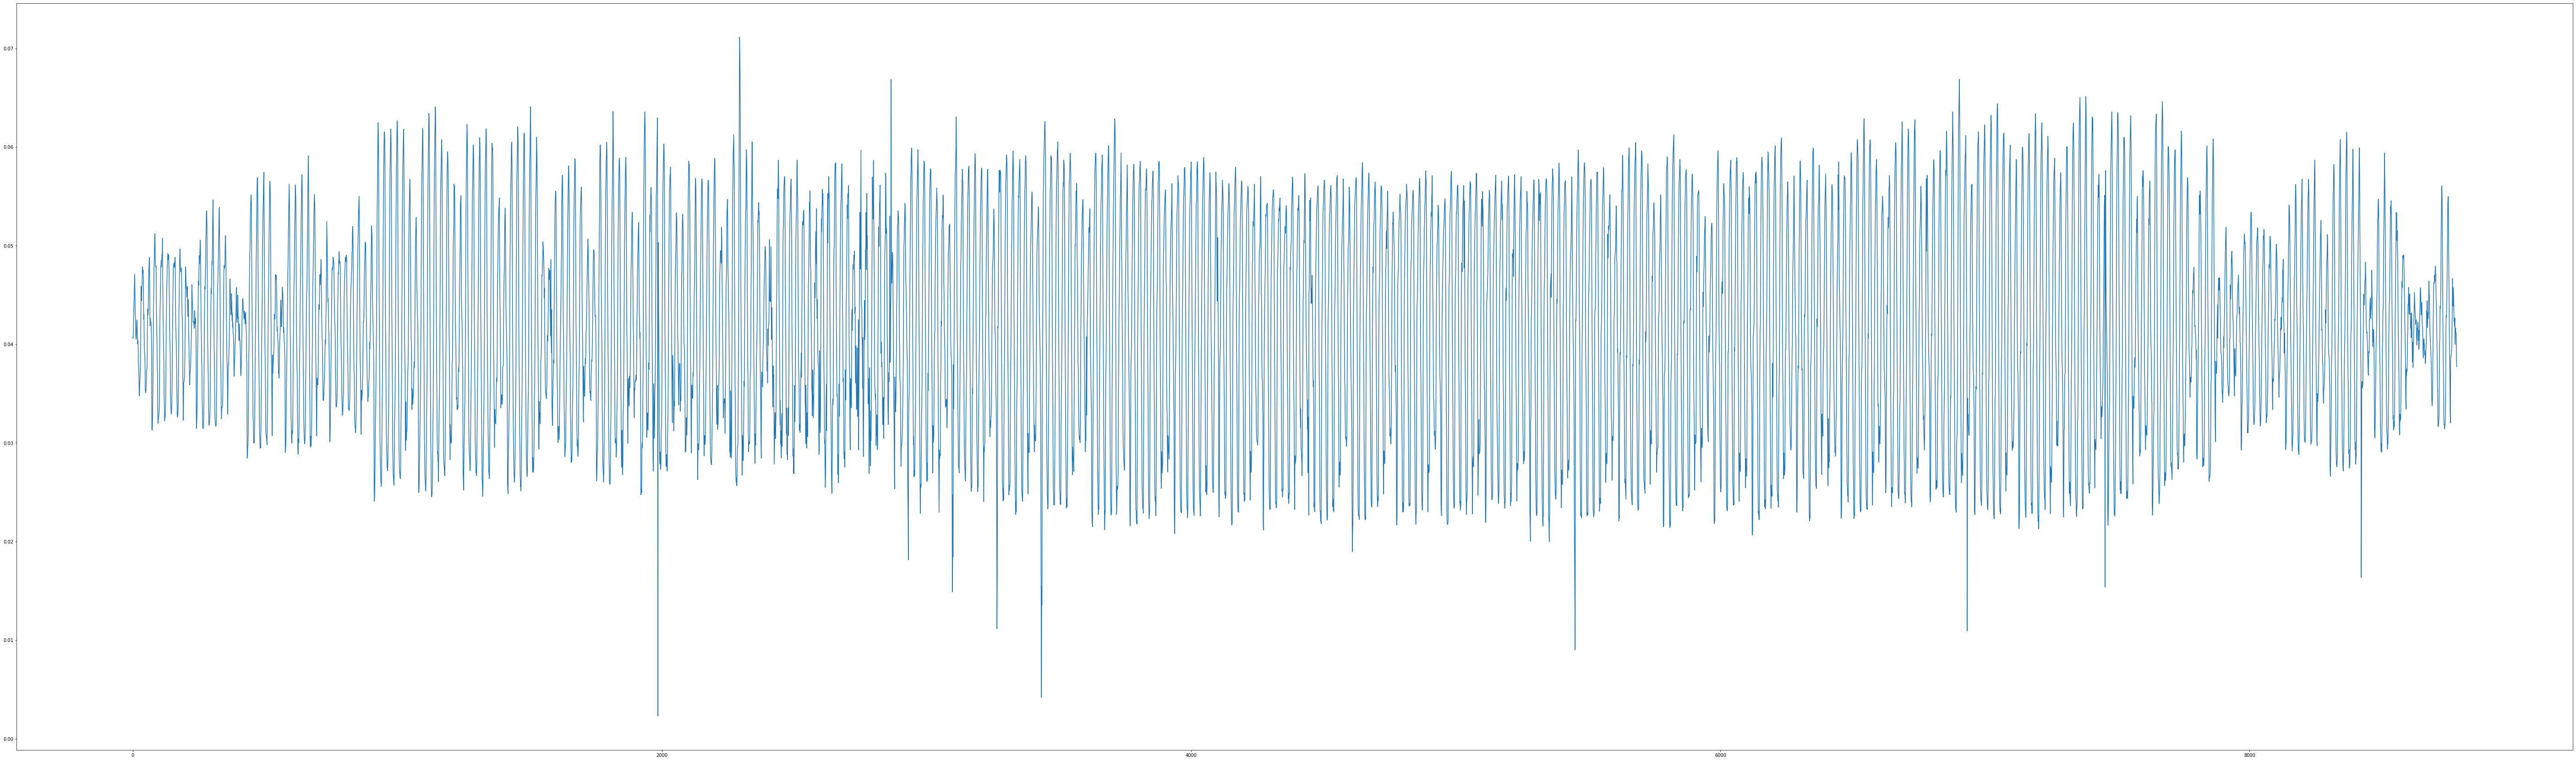

In [395]:
#EDA
plt.figure(figsize=(100,30))
plt.plot(values)
plt.show()

In [10]:
window_size = 24
# frame as supervised learning
reframed = series_to_supervised(values, 24, 1)
reframed.head()

var1(t-24)  var1(t-23)  var1(t-22)  var1(t-21)  var1(t-20)  var1(t-19)  \
24    0.040664    0.040585    0.041324    0.042763    0.043817    0.044726   
25    0.040585    0.041324    0.042763    0.043817    0.044726    0.045758   
26    0.041324    0.042763    0.043817    0.044726    0.045758    0.047115   
27    0.042763    0.043817    0.044726    0.045758    0.047115    0.045295   
28    0.043817    0.044726    0.045758    0.047115    0.045295    0.043373   

    var1(t-18)  var1(t-17)  var1(t-16)  var1(t-15)  ...  var1(t-9)  var1(t-8)  \
24    0.045758    0.047115    0.045295    0.043373  ...   0.042453   0.042181   
25    0.047115    0.045295    0.043373    0.042492  ...   0.042181   0.040829   
26    0.045295    0.043373    0.042492    0.040934  ...   0.040829   0.040033   
27    0.043373    0.042492    0.040934    0.040550  ...   0.040033   0.040405   
28    0.042492    0.040934    0.040550    0.040507  ...   0.040405   0.040207   

    var1(t-7)  var1(t-6)  var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  \
24   0.040829   0.040033   0.040405   0.040207   0.038334   0.037257   
25   0.040033   0.040405   0.040207   0.038334   0.037257   0.036768   
26   0.040405   0.040207   0.038334   0.037257   0.036768   0.034823   
27   0.040207   0.038334   0.037257   0.036768   0.034823   0.034765   
28   0.038334   0.037257   0.036768   0.034823   0.034765   0.035971   

    var1(t-1)   var1(t)  
24   0.036768  0.034823  
25   0.034823  0.034765  
26   0.034765  0.035971  
27   0.035971  0.036407  
28   0.036407  0.037375  

[5 rows x 25 columns]

In [11]:
reframed.shape #0부터 23까지는 사라짐

(8760, 25)

In [14]:
values.shape

(8784, 1)

In [380]:
24*31 +7848

8592

In [15]:
n_train_hours = 8760 - 31*24

In [16]:
n_train_hours

8016

In [17]:
n_test_hours = 31*24

In [18]:
n_test_hours

744

In [390]:
-n_test_hours

-744

In [19]:
#split train and test
values=reframed.values
n_test_hours = 31*24
train = values[:-n_test_hours, :]
test = values[-n_test_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [31]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window_size, int(train_X.shape[1]/window_size)))
test_X = test_X.reshape((test_X.shape[0], window_size, int(test_X.shape[1]/window_size)))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8016, 24, 1) (8016,) (744, 24, 1) (744, 1)


In [23]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [24]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Train on 8016 samples, validate on 744 samples
Epoch 1/50
 - 3s - loss: 0.0097 - val_loss: 0.0034
Epoch 2/50
 - 2s - loss: 0.0025 - val_loss: 0.0020
Epoch 3/50
 - 2s - loss: 0.0023 - val_loss: 0.0019
Epoch 4/50
 - 2s - loss: 0.0023 - val_loss: 0.0018
Epoch 5/50
 - 2s - loss: 0.0022 - val_loss: 0.0016
Epoch 6/50
 - 2s - loss: 0.0022 - val_loss: 0.0016
Epoch 7/50
 - 2s - loss: 0.0021 - val_loss: 0.0018
Epoch 8/50
 - 2s - loss: 0.0021 - val_loss: 0.0019
Epoch 9/50
 - 2s - loss: 0.0021 - val_loss: 0.0015
Epoch 10/50
 - 2s - loss: 0.0021 - val_loss: 0.0015
Epoch 11/50
 - 2s - loss: 0.0020 - val_loss: 0.0016
Epoch 12/50
 - 2s - loss: 0.0020 - val_loss: 0.0015
Epoch 13/50
 - 2s - loss: 0.0019 - val_loss: 0.0015
Epoch 14/50
 - 2s - loss: 0.0019 - val_loss: 0.0014
Epoch 15/50
 - 2s - loss: 0.0019 - val_loss: 0.0014
Epoch 16/50
 - 2s - loss: 0.0018 - val_loss: 0.0015
Epoch 17/50
 - 2s - loss: 0.0018 - val_loss: 0.0015
Epoch 18/50
 - 2s - loss: 0.0018 - val_loss: 0.0013
Epoch 19/50
 - 2s - loss:

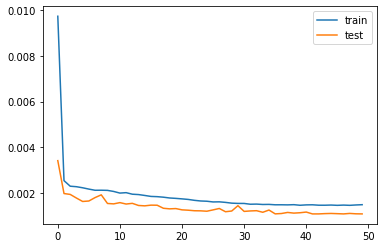

In [27]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [29]:
import math

In [32]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], window_size*test_X.shape[2]))
test_X[:,1:]
# # invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:7]), axis=1)
inv_yhat = inv_yhat[:,0]

test_y
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:7]), axis=1)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.002


In [33]:
test_y.shape

(744, 1)

In [35]:
np.savetxt("data/portion_yhat_revised2.csv", inv_yhat, delimiter=",")

In [34]:
yhat.shape

(744, 1)

In [36]:
# plotting
r=np.concatenate((yhat, test_X[:, 1:7]), axis=1)
r=pd.DataFrame(r)

In [38]:
def plot_series(time, series, format="-",start=0,end=None):
    plt.plot(time[start:end],series[start:end],format)
    plt.xlabel("Time")
    plt.ylabel("meter reading")
    plt.grid(True)

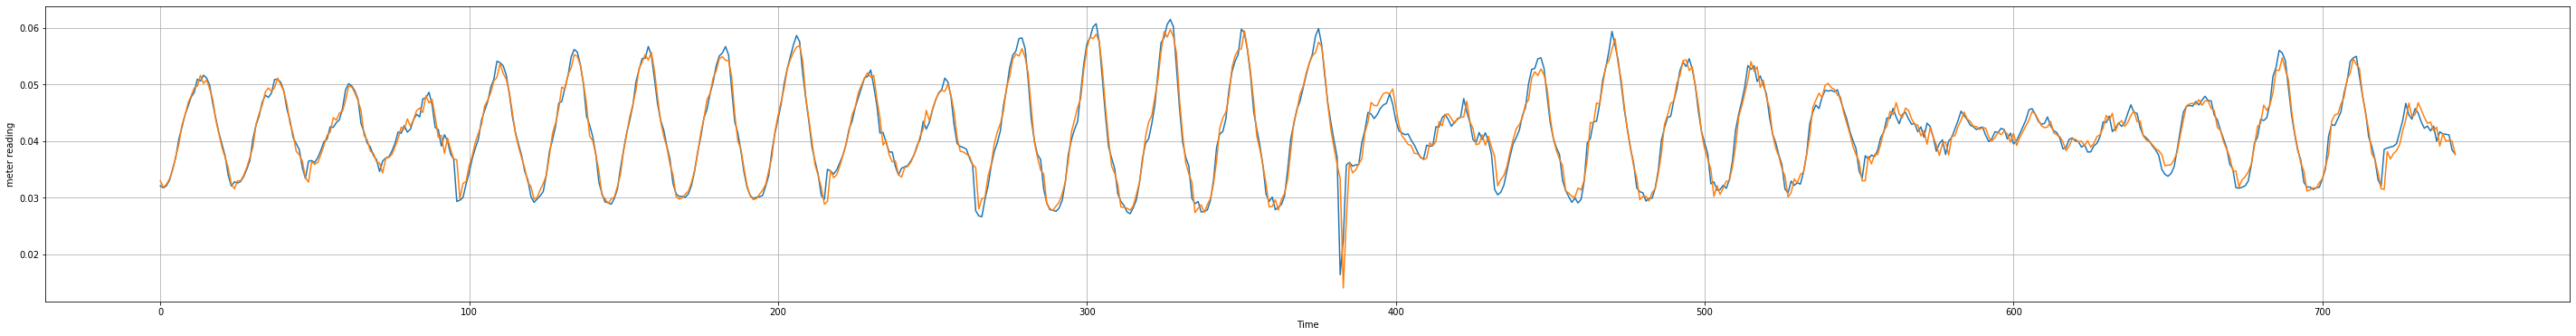

In [39]:
series = inv_y
time_step=[]
for x in range(len(series)):
    time_step.append(x)
time=np.array(time_step)
plt.figure(figsize=(50, 6))
plot_series(time,series)
plot_series(time,r[0])

In [40]:
inv_yhat.shape

(744,)

In [41]:
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [108]:
loaded_fit_model= joblib.load("SARIMAX(2,1,1)(2,0,1,7).pkl")

In [109]:
loaded_fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                     meter_reading   No. Observations:                  335
Model:             SARIMAX(2, 1, 1)x(2, 0, 1, 7)   Log Likelihood                 508.352
Date:                           Sat, 30 Nov 2019   AIC                           -980.704
Time:                                   05:23:32   BIC                           -912.104
Sample:                               01-01-2016   HQIC                          -953.352
                                    - 11-30-2016                                         
Covariance Type:                             opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
air_temperature        0.5396      0.059      9.093      0.000       0.423       0.656
Sunday                -0.2097      0.011    -19.933      0.000      -0.230      -0.189
Saturday              -0.1683      0.015    -11.265      0.000      -0.198      -0.139
holiday               -0.1653      0.009    -18.527      0.000      -0.183      -0.148
sea_level_pressure     0.0851      0.038      2.245      0.025       0.011       0.159
dew_temperature        0.1471      0.026      5.615      0.000       0.096       0.198
hot_temperature^2      0.2927      0.027     10.692      0.000       0.239       0.346
hot                   -0.1911      0.017    -11.575      0.000      -0.223      -0.159
Tuesday                0.0027      0.010      0.279      0.780      -0.016       0.022
cold                   0.0209      0.026      0.806      0.420      -0.030       0.072
Friday                -0.0316      0.014     -2.197      0.028      -0.060      -0.003
ar.L1                  0.6321      0.082      7.676      0.000       0.471       0.793
ar.L2                 -0.1156      0.065     -1.770      0.077      -0.244       0.012
ma.L1                 -0.8253      0.076    -10.865      0.000      -0.974      -0.676
ar.S.L7                0.6334      0.220      2.879      0.004       0.202       1.065
ar.S.L14               0.1186      0.063      1.873      0.061      -0.006       0.243
ma.S.L7               -0.6227      0.217     -2.872      0.004      -1.048      -0.198
sigma2                 0.0028      0.000     15.753      0.000       0.002       0.003
===================================================================================
Ljung-Box (Q):                       39.35   Jarque-Bera (JB):                54.99
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               1.63   Skew:                             0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
pred3 = selected_results1.predict(exog = selected_X_test, start = '2016-12-01', end = '2016-12-31')

In [111]:
pred3.head()

2016-12-01    0.111976
2016-12-02    0.084715
2016-12-03   -0.048223
2016-12-04   -0.114282
2016-12-05    0.112782
Freq: D, dtype: float64

In [113]:
inv_yhat.shape

(744,)

In [131]:
import datetime

In [160]:
day = pd.to_datetime(total_2.groupby('timestamp').sum().reset_index()['timestamp']).dt.strftime('%Y-%m-%d')

In [166]:
test_day = day[-744:]

In [175]:
test_day.reset_index()

index   timestamp
0     8040  2016-12-01
1     8041  2016-12-01
2     8042  2016-12-01
3     8043  2016-12-01
4     8044  2016-12-01
..     ...         ...
739   8779  2016-12-31
740   8780  2016-12-31
741   8781  2016-12-31
742   8782  2016-12-31
743   8783  2016-12-31

[744 rows x 2 columns]

In [167]:
pred_portion = pd.DataFrame(inv_yhat, columns = ['portion_yhat'])

In [168]:
pred_portion.head()

portion_yhat
0      0.033002
1      0.031791
2      0.032354
3      0.033328
4      0.034851

In [176]:
pred_portion['day'] = test_day.reset_index()['timestamp']

In [177]:
pred_portion.tail()

portion_yhat         day
739      0.041256  2016-12-31
740      0.039996  2016-12-31
741      0.040119  2016-12-31
742      0.039989  2016-12-31
743      0.037593  2016-12-31

In [178]:
pred_portion[-744:]

portion_yhat         day
0        0.033002  2016-12-01
1        0.031791  2016-12-01
2        0.032354  2016-12-01
3        0.033328  2016-12-01
4        0.034851  2016-12-01
..            ...         ...
739      0.041256  2016-12-31
740      0.039996  2016-12-31
741      0.040119  2016-12-31
742      0.039989  2016-12-31
743      0.037593  2016-12-31

[744 rows x 2 columns]

In [190]:
tmp = pred3.reset_index().rename(columns = {'index':'day', 0:'day_sum'})

In [193]:
tmp.tail()

day   day_sum
26 2016-12-27  0.128324
27 2016-12-28  0.166836
28 2016-12-29  0.182347
29 2016-12-30  0.179400
30 2016-12-31  0.031440

In [192]:
pred_portion

portion_yhat         day
0        0.033002  2016-12-01
1        0.031791  2016-12-01
2        0.032354  2016-12-01
3        0.033328  2016-12-01
4        0.034851  2016-12-01
..            ...         ...
739      0.041256  2016-12-31
740      0.039996  2016-12-31
741      0.040119  2016-12-31
742      0.039989  2016-12-31
743      0.037593  2016-12-31

[744 rows x 2 columns]

In [202]:
tmp.head()

day   day_sum
0 2016-12-01  0.111976
1 2016-12-02  0.084715
2 2016-12-03 -0.048223
3 2016-12-04 -0.114282
4 2016-12-05  0.112782

In [213]:
tmp['day'] = tmp['day'].dt.strftime('%Y-%m-%d')

In [214]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
day        31 non-null object
day_sum    31 non-null float64
dtypes: float64(1), object(1)
memory usage: 624.0+ bytes


In [216]:
prepared_portion = pd.merge(pred_portion,tmp)

In [218]:
prepared_portion.to_csv('prepared_portion.csv')

In [219]:
prepared_portion.head()

portion_yhat         day   day_sum
0      0.033002  2016-12-01  0.111976
1      0.031791  2016-12-01  0.111976
2      0.032354  2016-12-01  0.111976
3      0.033328  2016-12-01  0.111976
4      0.034851  2016-12-01  0.111976

In [220]:
prepared_portion['day_sum']*prepared_portion['portion_yhat']

0      0.003695
1      0.003560
2      0.003623
3      0.003732
4      0.003902
         ...   
739    0.001297
740    0.001257
741    0.001261
742    0.001257
743    0.001182
Length: 744, dtype: float64

In [221]:
hourly_convert = prepared_portion['day_sum']*prepared_portion['portion_yhat']

In [226]:
hourly_test = total_2.groupby('timestamp').sum()['2016-12-01':]['meter_reading']

In [229]:
hourly_training = total_2.groupby('timestamp').sum()[:'2016-12-01']['meter_reading']

In [230]:
hourly_training

timestamp
2016-01-01 00:00:00    2733.1470
2016-01-01 01:00:00    2727.7944
2016-01-01 02:00:00    2777.4856
2016-01-01 03:00:00    2874.1859
2016-01-01 04:00:00    2945.0675
                         ...    
2016-11-30 19:00:00    3368.0078
2016-11-30 20:00:00    3232.6568
2016-11-30 21:00:00    3123.0572
2016-11-30 22:00:00    2868.2611
2016-11-30 23:00:00    2781.1594
Name: meter_reading, Length: 8040, dtype: float64

In [227]:
hourly_residual = - hourly_test - hourly_convert

In [235]:
training_day_sum_predict = loaded_fit_model.predict()

In [253]:
portion.head()

time     value
0  2016-01-01 00:00:00  0.040664
1  2016-01-01 01:00:00  0.040585
2  2016-01-01 02:00:00  0.041324
3  2016-01-01 03:00:00  0.042763
4  2016-01-01 04:00:00  0.043817

In [255]:
portion = portion.reset_index()

In [256]:
portion.head()

time     value
0  2016-01-01 00:00:00  0.040664
1  2016-01-01 01:00:00  0.040585
2  2016-01-01 02:00:00  0.041324
3  2016-01-01 03:00:00  0.042763
4  2016-01-01 04:00:00  0.043817

In [257]:
portion['day'] = pd.to_datetime(portion.reset_index().time).dt.strftime('%Y-%m-%d')

In [258]:
portion.head()

time     value         day
0  2016-01-01 00:00:00  0.040664  2016-01-01
1  2016-01-01 01:00:00  0.040585  2016-01-01
2  2016-01-01 02:00:00  0.041324  2016-01-01
3  2016-01-01 03:00:00  0.042763  2016-01-01
4  2016-01-01 04:00:00  0.043817  2016-01-01

In [259]:
portion.to_csv('portion_with_day.csv')

In [264]:
training_test_predict= pd.concat([loaded_fit_model.predict(), pred3], axis=0)

In [274]:
training_test_predict.to_csv("training_test_predict.csv")

In [273]:
training_test_predict= training_test_predict.reset_index().rename(columns={'index':'day'})

In [278]:
portion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 3 columns):
time     8784 non-null object
value    8784 non-null float64
day      8784 non-null object
dtypes: float64(1), object(2)
memory usage: 206.0+ KB


In [279]:
training_test_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
day    366 non-null datetime64[ns]
0      366 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [283]:
training_test_predict.head()

day         0
0 2016-01-01 -0.067884
1 2016-01-02  0.119196
2 2016-01-03  0.046122
3 2016-01-04  0.280436
4 2016-01-05  0.181079

In [284]:
training_test_predict['day'] = training_test_predict.day.dt.strftime('%Y-%m-%d')

In [285]:
training_test_predict.head()

day         0
0  2016-01-01 -0.067884
1  2016-01-02  0.119196
2  2016-01-03  0.046122
3  2016-01-04  0.280436
4  2016-01-05  0.181079

In [286]:
training_test_predict.to_csv("training_test_predict.csv")

In [291]:
tabulated_portion=  pd.merge(portion,training_test_predict,on='day').rename(columns={'value':'portion',0:'day_sum'})

In [292]:
tabulated_portion.to_csv('tabulated_portion.csv')

In [293]:
tabulated_portion.head()

time   portion         day   day_sum
0  2016-01-01 00:00:00  0.040664  2016-01-01 -0.067884
1  2016-01-01 01:00:00  0.040585  2016-01-01 -0.067884
2  2016-01-01 02:00:00  0.041324  2016-01-01 -0.067884
3  2016-01-01 03:00:00  0.042763  2016-01-01 -0.067884
4  2016-01-01 04:00:00  0.043817  2016-01-01 -0.067884

In [303]:
maxx = np.max(total_2.groupby('timestamp').sum()['meter_reading'])

In [307]:
total_2.groupby('timestamp').sum()['meter_reading']

timestamp
2016-01-01 00:00:00    2733.1470
2016-01-01 01:00:00    2727.7944
2016-01-01 02:00:00    2777.4856
2016-01-01 03:00:00    2874.1859
2016-01-01 04:00:00    2945.0675
                         ...    
2016-12-31 19:00:00    2849.6376
2016-12-31 20:00:00    2845.4954
2016-12-31 21:00:00    2838.7294
2016-12-31 22:00:00    2652.2397
2016-12-31 23:00:00    2605.6898
Name: meter_reading, Length: 8784, dtype: float64

In [304]:
minn = np.min(total_2.groupby('timestamp').sum()['meter_reading'])

In [312]:
total_2.groupby('timestamp').sum()['meter_reading'].values

array([2733.147 , 2727.7944, 2777.4856, ..., 2838.7294, 2652.2397,
       2605.6898])

In [366]:
hourly_converted_prediction = (tabulated_portion['portion']*tabulated_portion['day_sum']*(maxx-minn)+minn)*10

In [376]:
hourly_converted_prediction.to_csv("hourly_converted_prediction.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


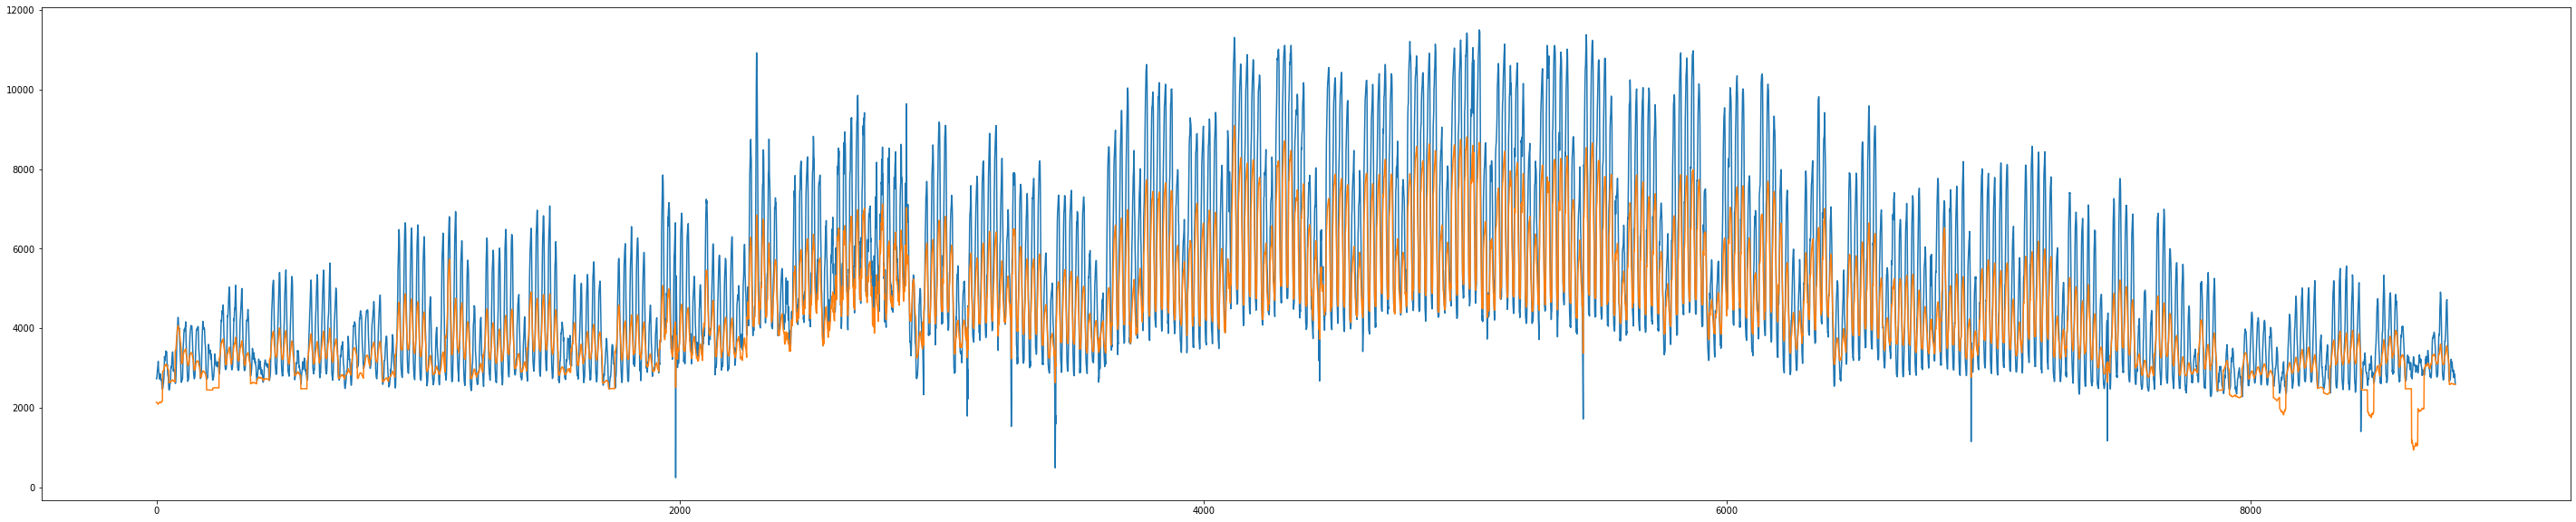

In [368]:
plt.figure(figsize=(50,10))

plt.plot(total_2.groupby('timestamp').sum()['meter_reading'].values)
plt.plot(hourly_converted_prediction)

In [318]:
((tabulated_portion['portion']*tabulated_portion['day_sum']*(maxx-minn)+minn)*10)[-744:]

8040    2855.415820
8041    2850.597414
8042    2855.471553
8043    2867.757353
8044    2892.683114
           ...     
8779    2596.885696
8780    2596.673478
8781    2596.326835
8782    2586.772394
8783    2584.387500
Length: 744, dtype: float64

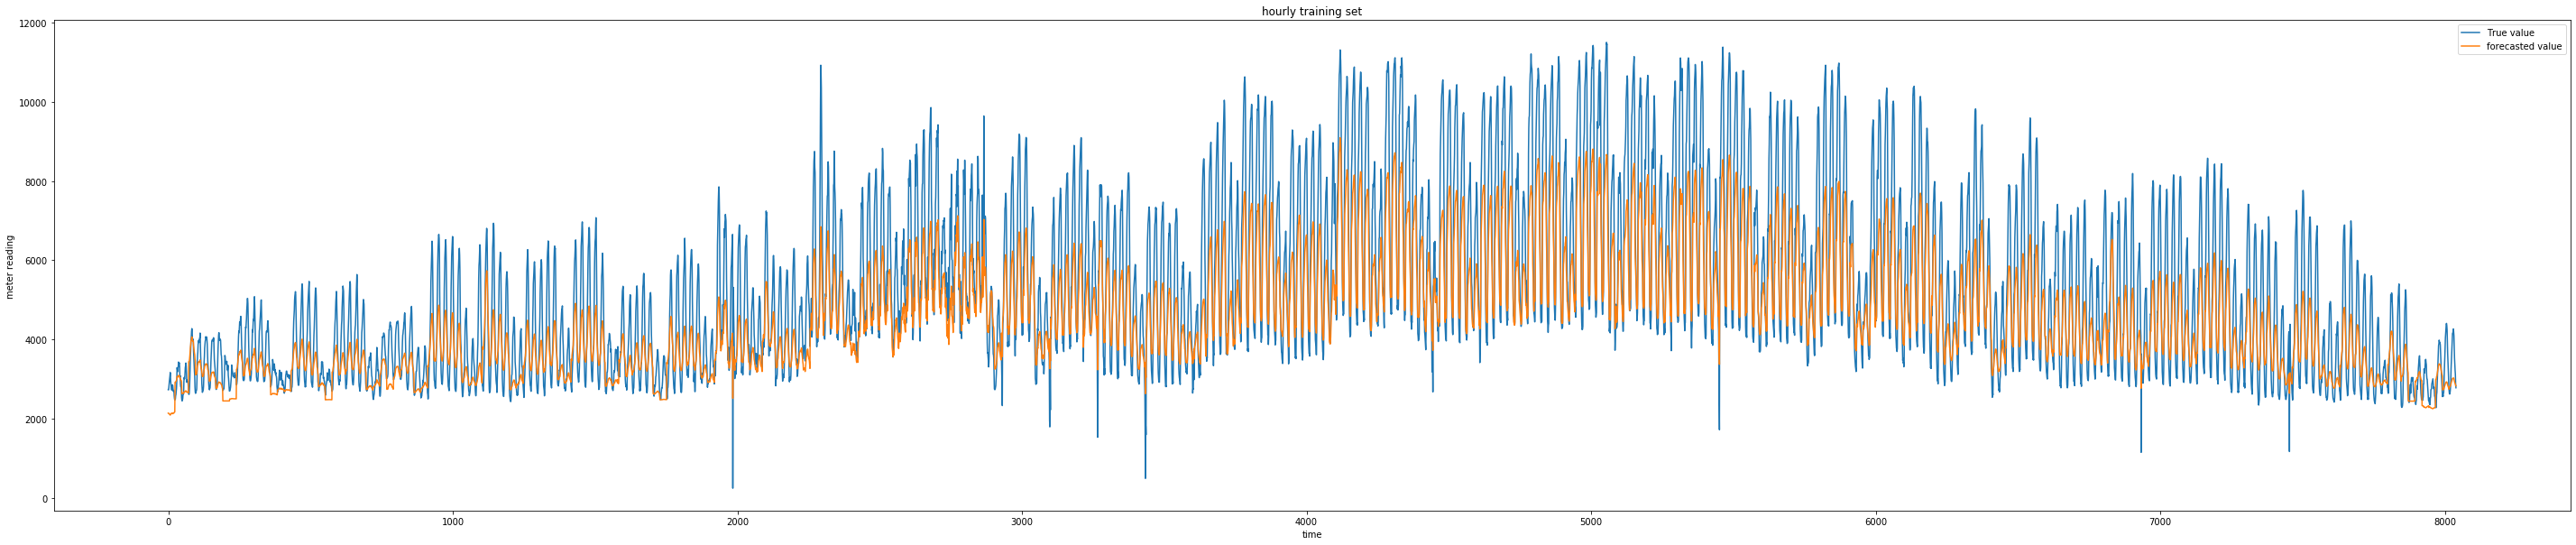

In [325]:
plt.figure(figsize=(50,10))

plt.title("hourly training set")
plt.xlabel("time")
plt.ylabel("meter reading")
plt.plot(total_2.groupby('timestamp').sum()['meter_reading'].values[:-744], label='True value')
plt.plot(hourly_converted_prediction[:-744], label='forecasted value')


plt.legend()
plt.savefig("hourly_training_set")

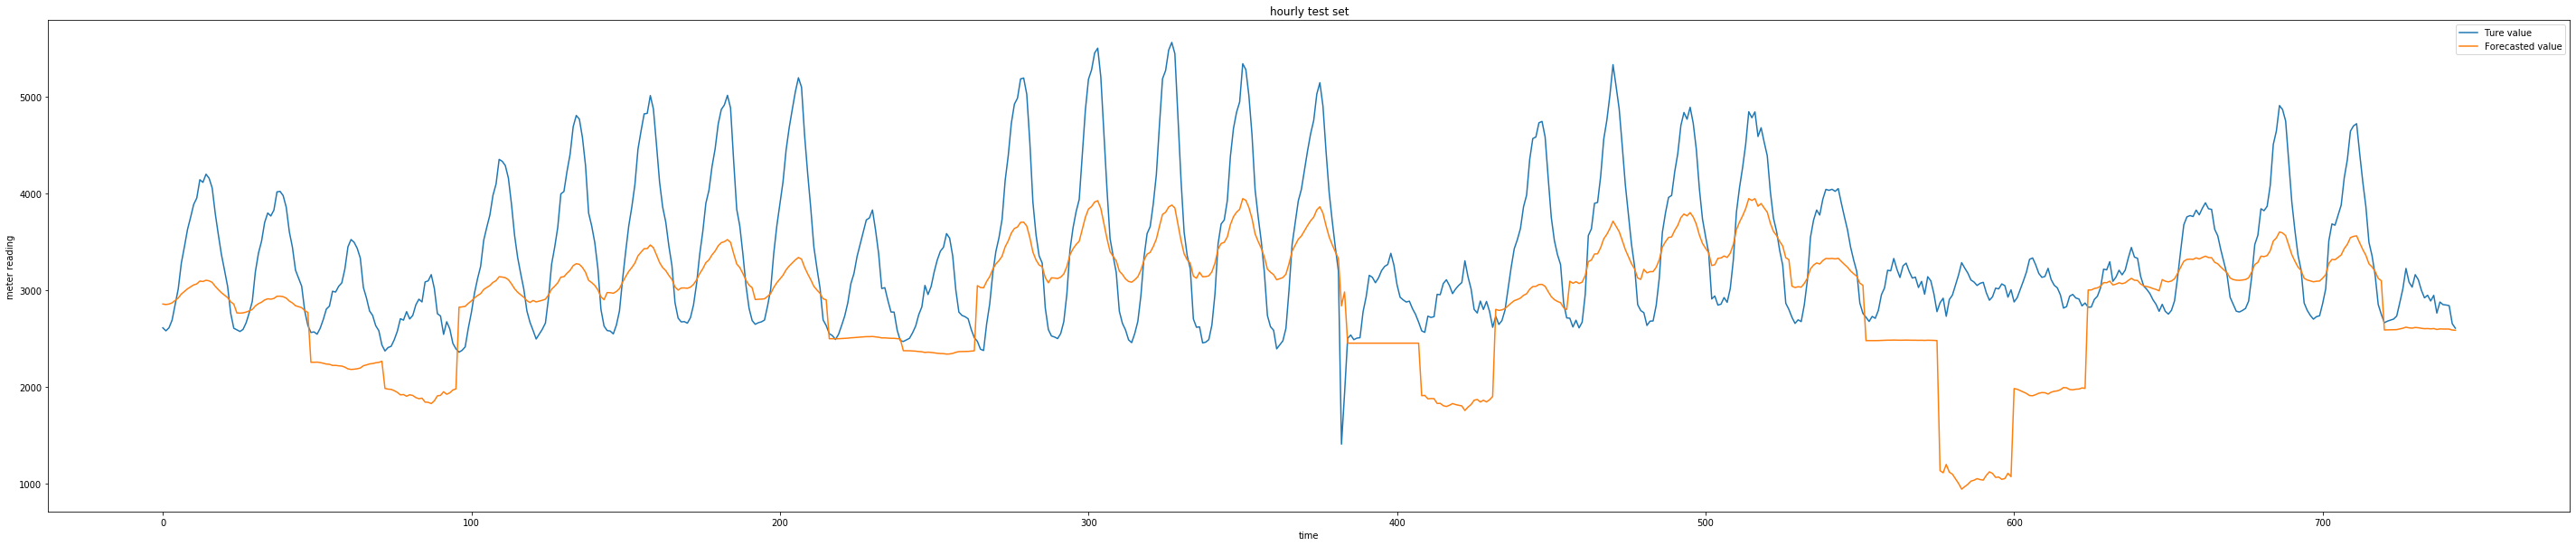

In [326]:
plt.figure(figsize=(50,10))

plt.title("hourly test set")
plt.xlabel("time")
plt.ylabel("meter reading")
plt.plot(total_2.groupby('timestamp').sum()['meter_reading'].values[-744:], label = 'Ture value')
plt.plot(hourly_converted_prediction[-744:], label='Forecasted value')
plt.legend()

plt.savefig("hourly_test_set")

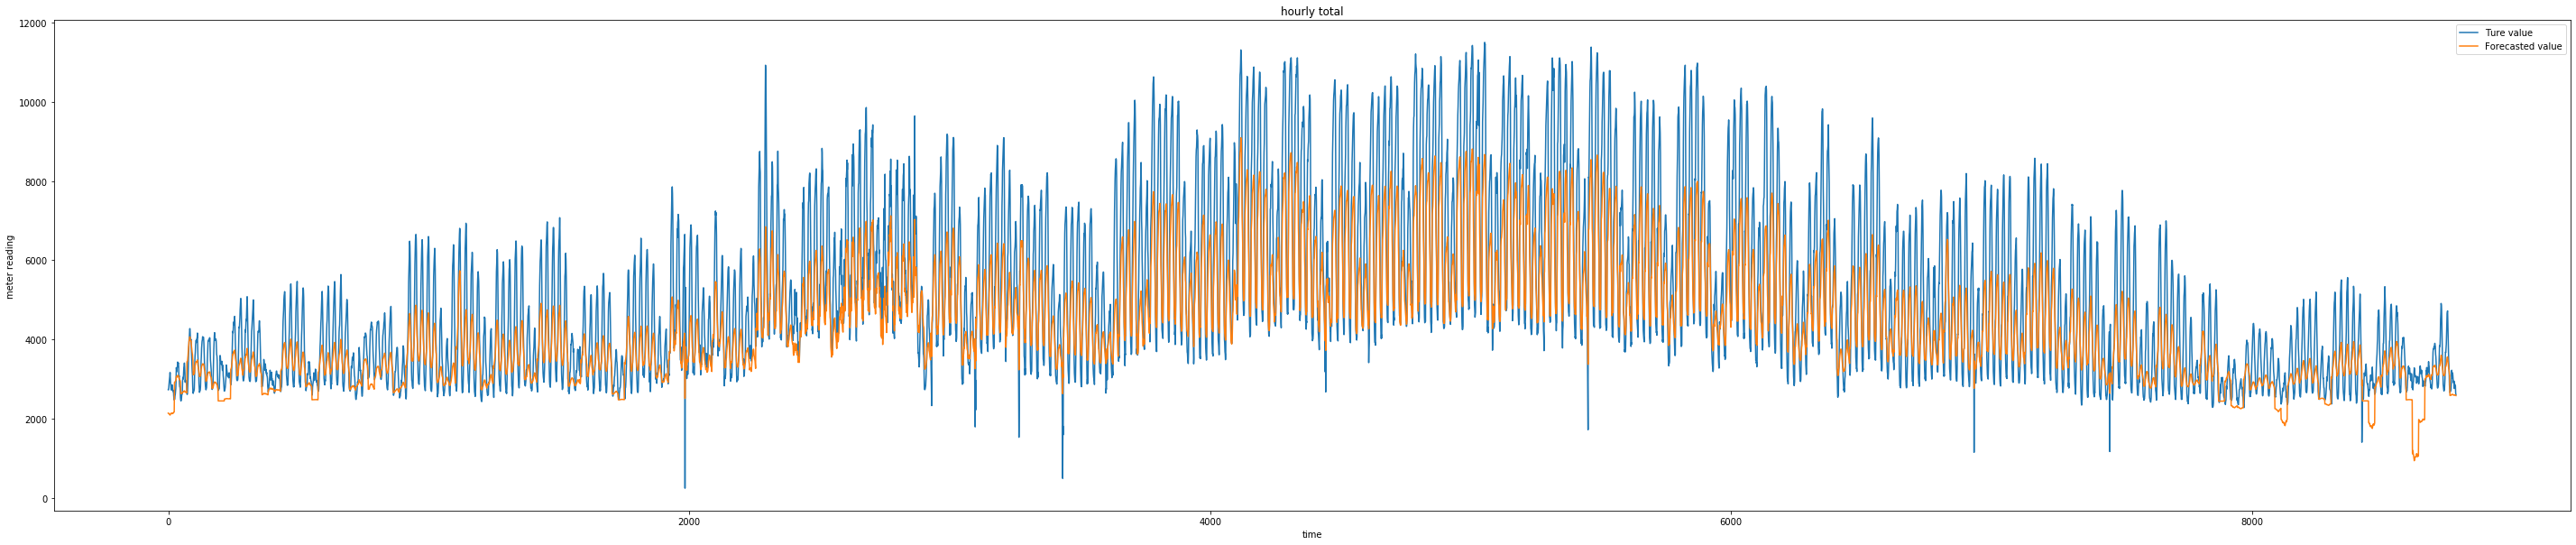

In [327]:
plt.figure(figsize=(50,10))

plt.title("hourly total")
plt.xlabel("time")
plt.ylabel("meter reading")
plt.plot(total_2.groupby('timestamp').sum()['meter_reading'].values, label = 'Ture value')
plt.plot(hourly_converted_prediction.values, label='Forecasted value')
plt.legend()

plt.savefig("hourly_total")

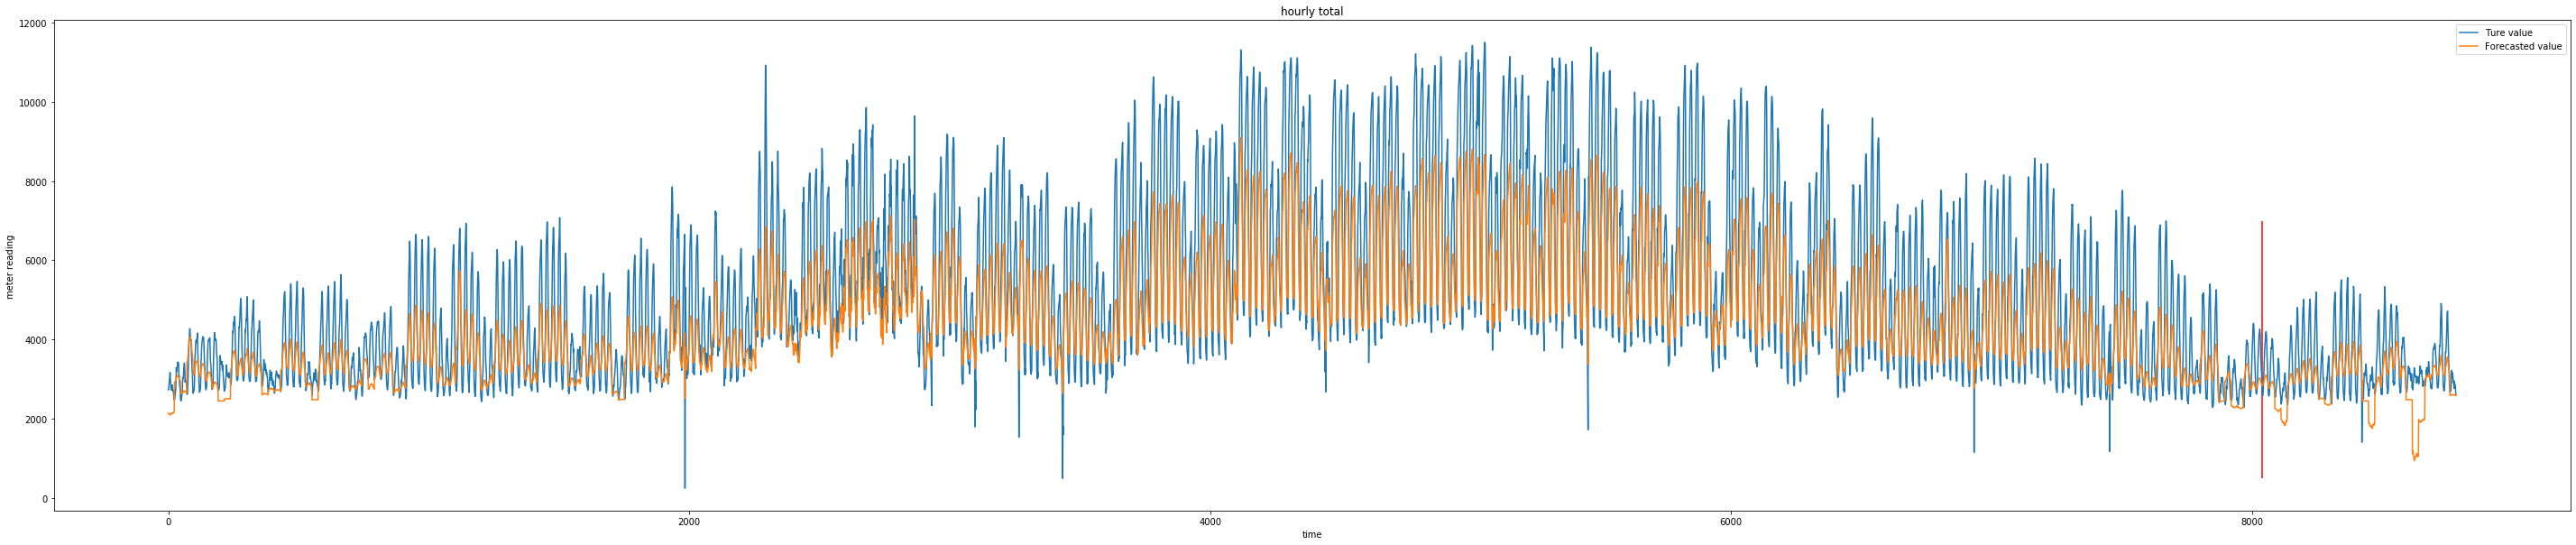

In [337]:
plt.figure(figsize=(50,10))

plt.title("hourly total")
plt.xlabel("time")
plt.ylabel("meter reading")
plt.plot(total_2.groupby('timestamp').sum()['meter_reading'].values, label = 'Ture value')
plt.plot(hourly_converted_prediction.values, label='Forecasted value')
plt.legend()

plt.vlines(8040, ymin =500, ymax=7000, colors = 'r')
plt.savefig('hourly_total_vline')

In [339]:
hourly_residual = total_2.groupby('timestamp').sum()['meter_reading'].values[:-744] - ((tabulated_portion['portion']*tabulated_portion['day_sum']*(maxx-minn)+minn)*10).values[:-744]

In [340]:
hourly_residual.shape

(8040,)

In [348]:
hourly_residual_df = pd.DataFrame(hourly_residual).rename(columns = {0:'residual'})

In [349]:
hourly_residual_df.to_csv("hourly_residual.csv")

In [352]:
hourly_residual_error = total_2.groupby('timestamp').sum()['meter_reading'].values - ((tabulated_portion['portion']*tabulated_portion['day_sum']*(maxx-minn)+minn)*10).values

In [353]:
hourly_residual_error_df =  pd.DataFrame(hourly_residual_error).rename(columns = {0:'residual_error'})

In [354]:
hourly_residual_error_df

residual_error
0         592.988916
1         587.027778
2         642.368379
3         750.062551
4         829.002691
...              ...
8779      252.751904
8780      248.821922
8781      242.402565
8782       65.467306
8783       21.302300

[8784 rows x 1 columns]

In [390]:
values = hourly_residual_error_df.values

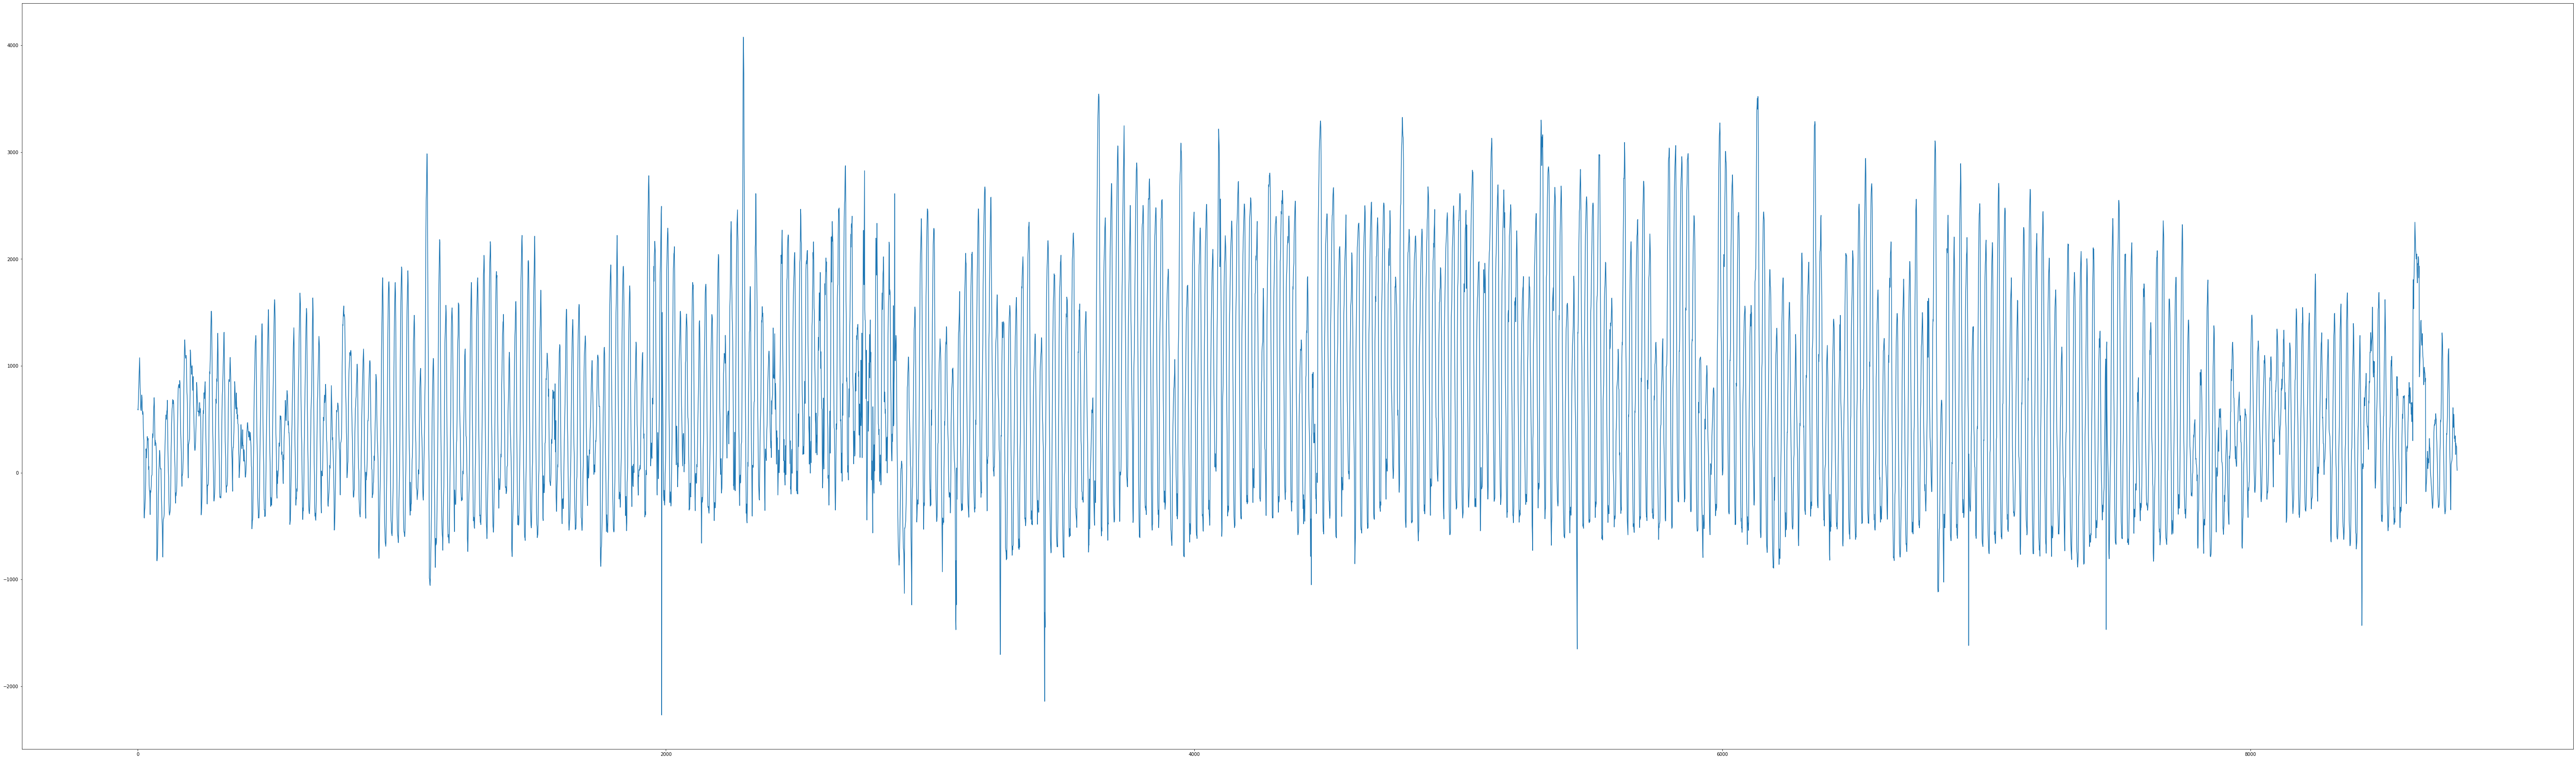

In [356]:
#EDA
plt.figure(figsize=(100,30))
plt.plot(values)
plt.show()

In [391]:
window_size = 24
# frame as supervised learning
reframed = series_to_supervised(values, 24, 1)
reframed.head()

var1(t-24)  var1(t-23)  var1(t-22)   var1(t-21)   var1(t-20)   var1(t-19)  \
24  592.988916  587.027778  642.368379   750.062551   829.002691   897.024436   
25  587.027778  642.368379  750.062551   829.002691   897.024436   974.270320   
26  642.368379  750.062551  829.002691   897.024436   974.270320  1075.884412   
27  750.062551  829.002691  897.024436   974.270320  1075.884412   939.636672   
28  829.002691  897.024436  974.270320  1075.884412   939.636672   795.759152   

     var1(t-18)   var1(t-17)  var1(t-16)  var1(t-15)  ...   var1(t-9)  \
24   974.270320  1075.884412  939.636672  795.759152  ...  726.894566   
25  1075.884412   939.636672  795.759152  729.780249  ...  706.509136   
26   939.636672   795.759152  729.780249  613.175775  ...  605.354218   
27   795.759152   729.780249  613.175775  584.459609  ...  545.771349   
28   729.780249   613.175775  584.459609  581.232246  ...  573.605473   

     var1(t-8)   var1(t-7)   var1(t-6)   var1(t-5)   var1(t-4)   var1(t-3)  \
24  706.509136  605.354218  545.771349  573.605473  558.747955  418.572007   
25  605.354218  545.771349  573.605473  558.747955  418.572007  337.979707   
26  545.771349  573.605473  558.747955  418.572007  337.979707  301.326828   
27  573.605473  558.747955  418.572007  337.979707  301.326828 -421.230028   
28  558.747955  418.572007  337.979707  301.326828 -421.230028 -424.592248   

     var1(t-2)   var1(t-1)     var1(t)  
24  337.979707  301.326828 -421.230028  
25  301.326828 -421.230028 -424.592248  
26 -421.230028 -424.592248 -354.288846  
27 -424.592248 -354.288846 -328.902879  
28 -354.288846 -328.902879 -272.460158  

[5 rows x 25 columns]

In [358]:
reframed.shape #0부터 23까지는 사라짐

(8760, 25)

In [392]:
#split train and test
values=reframed.values
n_test_hours = 31*24
train = values[:-n_test_hours, :]
test = values[-n_test_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [393]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window_size, int(train_X.shape[1]/window_size)))
test_X = test_X.reshape((test_X.shape[0], window_size, int(test_X.shape[1]/window_size)))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8016, 24, 1) (8016,) (744, 24, 1) (744,)


In [394]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [395]:
# fit network
history = model.fit(train_X, train_y, epochs=400, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 8016 samples, validate on 744 samples
Epoch 1/400
 - 2s - loss: 922.3245 - val_loss: 636.1116
Epoch 2/400
 - 2s - loss: 919.2910 - val_loss: 632.7418
Epoch 3/400
 - 2s - loss: 915.8618 - val_loss: 629.2161
Epoch 4/400
 - 2s - loss: 912.4274 - val_loss: 625.7302
Epoch 5/400
 - 2s - loss: 908.9813 - val_loss: 622.3647
Epoch 6/400
 - 2s - loss: 906.0501 - val_loss: 619.6806
Epoch 7/400
 - 2s - loss: 903.5342 - val_loss: 616.6501
Epoch 8/400
 - 2s - loss: 900.3573 - val_loss: 613.3601
Epoch 9/400
 - 2s - loss: 897.5234 - val_loss: 610.1831
Epoch 10/400
 - 2s - loss: 894.7057 - val_loss: 607.3866
Epoch 11/400
 - 2s - loss: 891.9454 - val_loss: 604.3057
Epoch 12/400
 - 2s - loss: 888.8129 - val_loss: 600.9903
Epoch 13/400
 - 2s - loss: 886.1309 - val_loss: 597.9045
Epoch 14/400
 - 2s - loss: 883.4468 - val_loss: 595.3568
Epoch 15/400
 - 2s - loss: 880.8156 - val_loss: 592.3616
Epoch 16/400
 - 2s - loss: 878.5597 - val_loss: 590.0033
Epoch 17/400
 - 2s - loss: 875.6497 - val_loss: 58

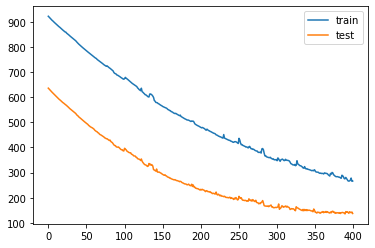

In [396]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [397]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], window_size*test_X.shape[2]))
test_X[:,1:]
# # invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:7]), axis=1)
inv_yhat = inv_yhat[:,0]

test_y
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:7]), axis=1)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 216.856


In [398]:
# plotting
r=np.concatenate((yhat, test_X[:, 1:7]), axis=1)
r=pd.DataFrame(r)

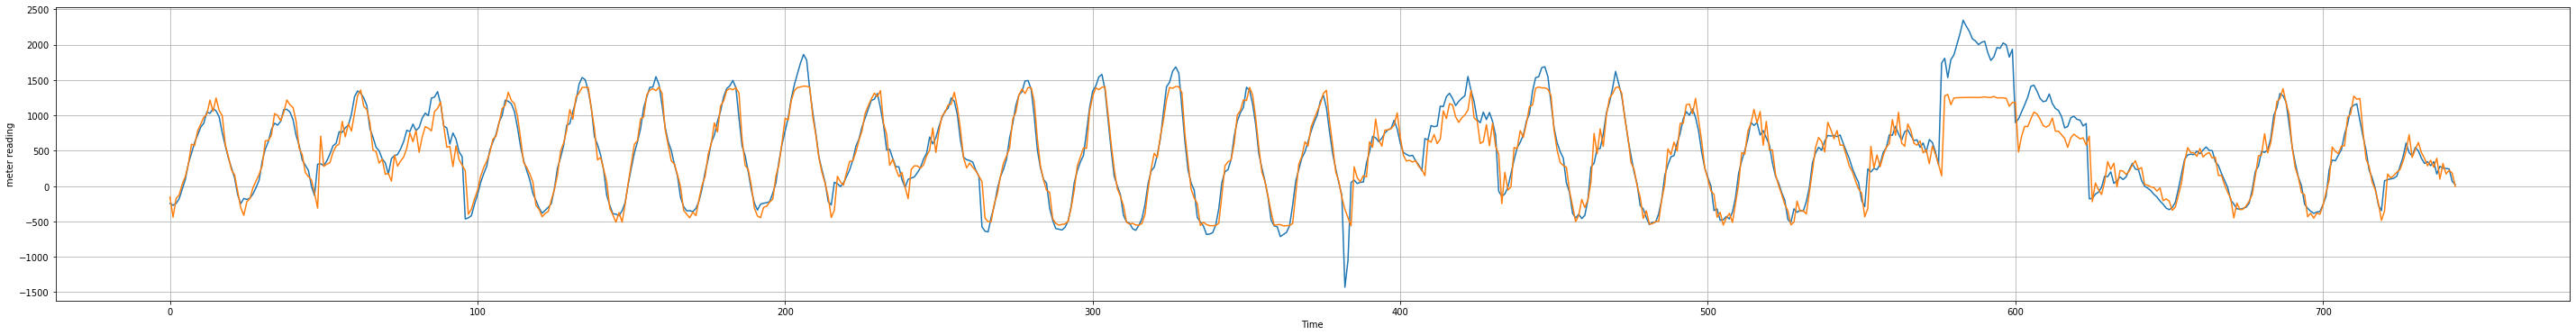

In [399]:
series = inv_y
time_step=[]
for x in range(len(series)):
    time_step.append(x)
time=np.array(time_step)
plt.figure(figsize=(50, 6))
plot_series(time,series)
plot_series(time,r[0])

In [400]:
hybrid_prediction2 = inv_yhat + hourly_converted_prediction[-744:]

In [401]:
hybrid_prediction2.to_csv("hybrid_prediction2.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


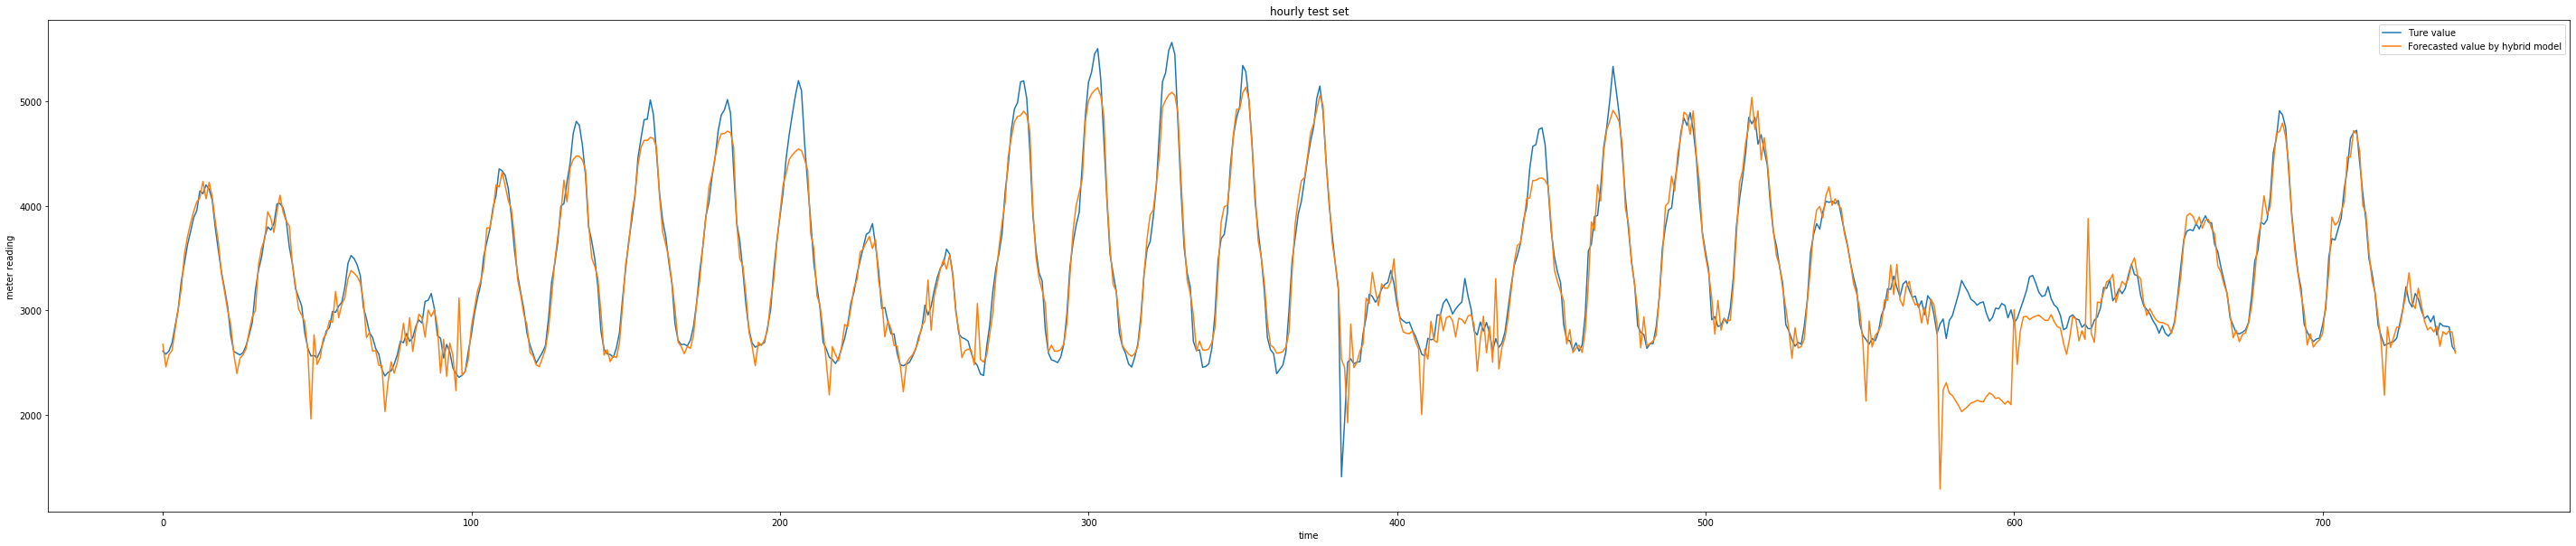

In [402]:
plt.figure(figsize=(50,10))

plt.title("hourly test set")
plt.xlabel("time")
plt.ylabel("meter reading")
plt.plot(total_2.groupby('timestamp').sum()['meter_reading'].values[-744:], label = 'Ture value')
plt.plot(hybrid_prediction.reset_index(drop=True), label='Forecasted value by hybrid model')
plt.legend()
